# telecom_churn

In [72]:
#├── data/
#│   ├── raw_data.csv             # Raw data
#│   └── processed_data.csv       # Preprocessed data
#│
#├── src/
#│   ├── data_preprocessing.py    # Preprocessing and feature engineering
#│   ├── model_training.py        # Individual model training
#│   ├── model_evaluation.py      # Evaluation of multiple models
#│   ├── model_ensembling.py     # Ensemble methods (Voting, Stacking, etc.)
#│   ├── churn_pipeline.py        # Main pipeline for end-to-end workflow
#│   └── hyperparameter_tuning.py # Hyperparameter optimization (GridSearchCV, RandomizedSearchCV)
#│
#├── notebooks/
#│   └── churn_prediction.ipynb   # Exploration, EDA, and model comparison
#│
#├── requirements.txt            # Python dependencies

# └── README.md                   # Project overview

In [73]:
#import data
#feature engineering
#⁠EDA
#⁠⁠Use Classifier to transform and do preprocessing 
#⁠⁠run decision tree models
#⁠⁠ensamble
#⁠⁠hypertune
#Explain key clusters, feature importance, and model customization

In [74]:
# data.py
import os
import shutil
import kagglehub
import pandas as pd

In [75]:
#Get Data

# Load raw data
data = pd.read_csv('../data/churndata.csv')

# Inspect the first few rows of the data
data.head()
#drop customerID
data = data.drop('customerID', axis=1)


In [76]:
#info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [77]:
# Remove any non-numeric characters, convert, and handle errors (coerce will convert invalid values to NaN)
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')

# After coercion, there may be NaN values. Let's handle them.
#count NaNs
print(data['TotalCharges'].isna().sum())

# We can fill NaNs with the median.
data['TotalCharges'].fillna(data['TotalCharges'].median(), inplace=True)

11


/var/folders/c0/4_nzbp_d3p7d9f_517mx6zlh0000gn/T/ipykernel_58780/2132474324.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['TotalCharges'].fillna(data['TotalCharges'].median(), inplace=True)


In [78]:
#count unique values in each column
data.nunique()


gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

In [79]:
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [80]:
#printing unique values in each column
for column in data.columns:
    print(f"{column}: {data[column].unique()}")

gender: ['Female' 'Male']
SeniorCitizen: [0 1]
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
tenure: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
PhoneService: ['No' 'Yes']
MultipleLines: ['No phone service' 'No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['No' 'Yes' 'No internet service']
StreamingTV: ['No' 'Yes' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges: [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalChar

In [81]:
#for the following columns, replace 'No internet service' and 'No phone service' with 'No'
replace_cols = ["MultipleLines", "OnlineSecurity", "OnlineBackup", "DeviceProtection",
                "TechSupport", "StreamingTV", "StreamingMovies"]

for col in replace_cols:
    data[col] = data[col].replace({'No internet service': 'No', 'No phone service': 'No'})

#printing unique values in each column
for column in data.columns:
    print(f"{column}: {data[column].unique()}")

gender: ['Female' 'Male']
SeniorCitizen: [0 1]
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
tenure: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
PhoneService: ['No' 'Yes']
MultipleLines: ['No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes']
OnlineBackup: ['Yes' 'No']
DeviceProtection: ['No' 'Yes']
TechSupport: ['No' 'Yes']
StreamingTV: ['No' 'Yes']
StreamingMovies: ['No' 'Yes']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges: [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges: [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn: ['No' 'Yes']


In [82]:
numeric_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
#printing numeric columns with their data types, min, max, mean, median
data[numeric_cols].describe().round(2)

,tenure,MonthlyCharges,TotalCharges
count,7043.00,7043.00,7043.00
mean,32.37,64.76,2281.92
std,24.56,30.09,2265.27
min,0.00,18.25,18.80
25%,9.00,35.50,402.22
50%,29.00,70.35,1397.48
75%,55.00,89.85,3786.60
max,72.00,118.75,8684.80


In [83]:
boolean_cols = ['SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
                'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
                'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'Churn']

categorical_cols = ['gender', 'InternetService', 'Contract', 'PaymentMethod']


#for boolean columns, convert 'Yes'/'No' to 1/0, if only yes/no values exist, else leave as is
for col in boolean_cols:
    if set(data[col].unique()) == {'Yes', 'No'}:
        data[col] = data[col].map({'Yes': 1, 'No': 0})
    
    # count NaNs if any
    print(f"{col} NaNs: {data[col].isna().sum()}")
    
    # drop NaNs if any
    data[col].dropna(inplace=True)
    
    # convert to int
    data[col] = data[col].astype(int)


SeniorCitizen NaNs: 0
Partner NaNs: 0
Dependents NaNs: 0
PhoneService NaNs: 0
MultipleLines NaNs: 0
OnlineSecurity NaNs: 0
OnlineBackup NaNs: 0
DeviceProtection NaNs: 0
TechSupport NaNs: 0
StreamingTV NaNs: 0
StreamingMovies NaNs: 0
PaperlessBilling NaNs: 0
Churn NaNs: 0


In [84]:
#Unique values in categorical columns
for col in data.columns:
    print(f"{col}: {data[col].unique()} + {data[col].dtypes}")

gender: ['Female' 'Male'] + object
SeniorCitizen: [0 1] + int64
Partner: [1 0] + int64
Dependents: [0 1] + int64
tenure: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39] + int64
PhoneService: [0 1] + int64
MultipleLines: [0 1] + int64
InternetService: ['DSL' 'Fiber optic' 'No'] + object
OnlineSecurity: [0 1] + int64
OnlineBackup: [1 0] + int64
DeviceProtection: [0 1] + int64
TechSupport: [0 1] + int64
StreamingTV: [0 1] + int64
StreamingMovies: [0 1] + int64
Contract: ['Month-to-month' 'One year' 'Two year'] + object
PaperlessBilling: [1 0] + int64
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)'] + object
MonthlyCharges: [29.85 56.95 53.85 ... 63.1  44.2  78.7 ] + float64
TotalCharges: [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ] + float64
Churn: [0

In [85]:
#checking StreamingTV unique values when StreamingMovies is 0
print(data[data['StreamingMovies'] == 0]['StreamingTV'].unique())

#that means StreamingTV and StreamingMovies are different,

[0 1]


In [86]:
#Churn Binary (0/1) Class Ration
# Check the %/count target variable classes
print(data['Churn'].value_counts(normalize=False).round(2))
print(data['Churn'].value_counts(normalize=True).round(2))  


Churn
0    5174
1    1869
Name: count, dtype: int64
Churn
0    0.73
1    0.27
Name: proportion, dtype: float64


#import data

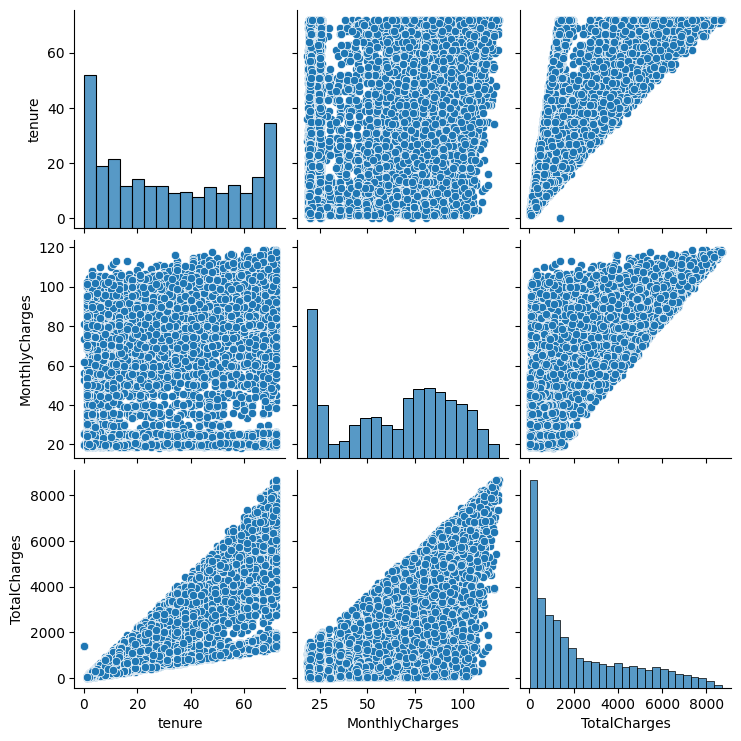

In [87]:
# Scatter plot matrix for numeric columns with churn as hue
import seaborn as sns
import matplotlib.pyplot as plt
sns.pairplot(data[numeric_cols])
plt.show()


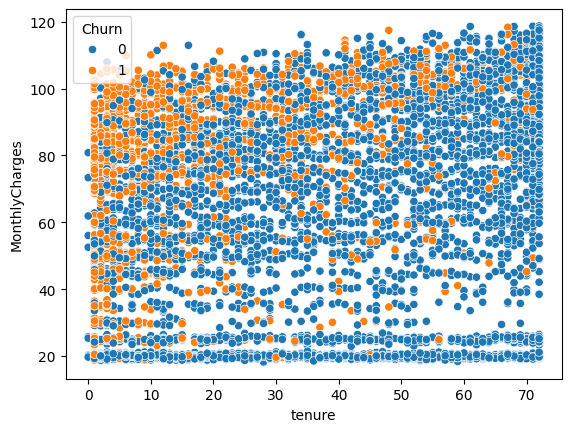

In [88]:
# scatter plot of numeric columns with churn as hue on same canvas
sns.scatterplot(x='tenure', y='MonthlyCharges', hue='Churn', data=data)
plt.show()


#here I see intense Churn on low tenure customers with high monthly charges.
#I also see that high tenure customers have low churn, altho there are some high tenure customers with high monthly charges that churn.
#This suggests that customers who have been with the company for a long time are less likely to churn, but high monthly charges can still be a factor for churn even among long-term customers.
#This insight can be useful for targeting retention efforts towards customers with high monthly charges, especially those who are newer to the company.


In [89]:
#print col names
print(data.columns)

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')


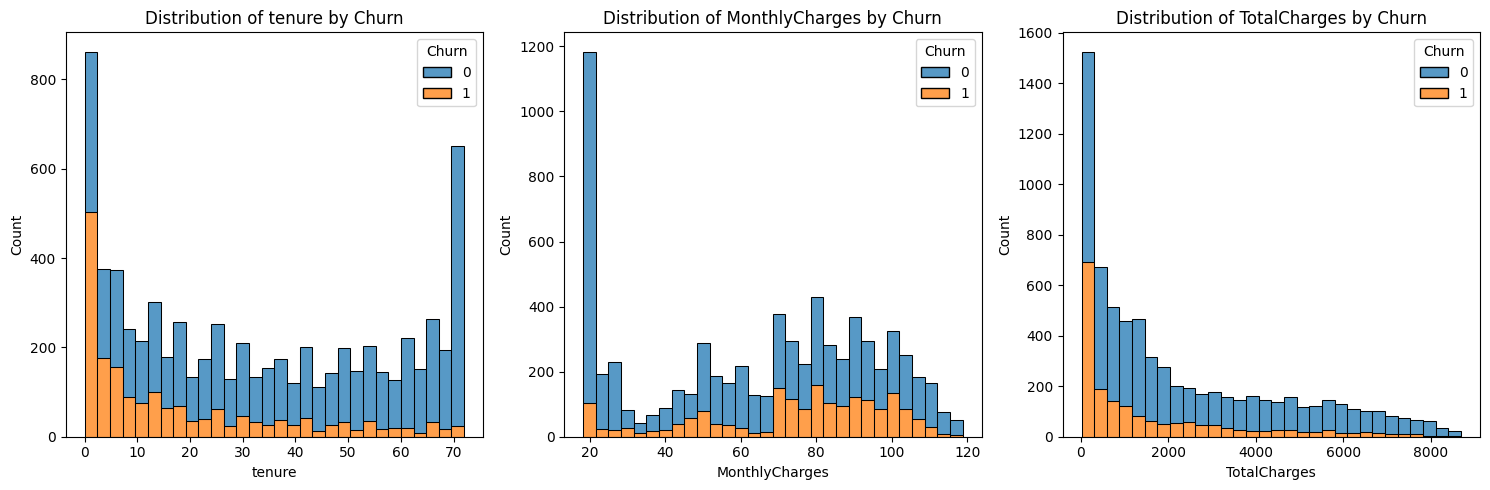

In [90]:
# distribution of numeric columns with Churn hue on same 1-3 canvas
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))
for i, col in enumerate(numeric_cols):
    sns.histplot(data=data, x=col, hue='Churn', multiple='stack', bins=30, ax=axes[i])
    axes[i].set_title(f'Distribution of {col} by Churn')
plt.tight_layout()
plt.show()


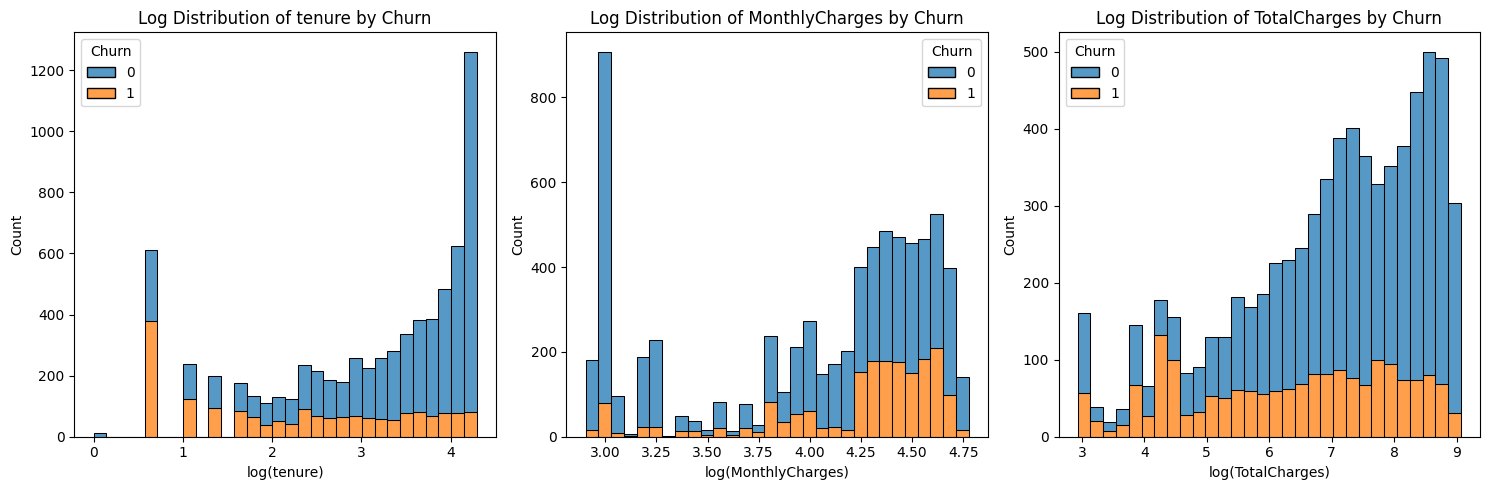

In [91]:
#log normal distribution of numeric columns on same 1-3 canvas
import numpy as np

# Create log-transformed distributions
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

for i, col in enumerate(numeric_cols):
    # Create a copy of the data to avoid modifying original
    plot_data = data.copy()
    
    # Apply log transformation (add small value to avoid log(0))
    # For tenure and MonthlyCharges, we might have 0 values
    if col == 'tenure':
        plot_data[f'log_{col}'] = np.log1p(plot_data[col])  # log1p handles 0 values better
    else:
        # Add small epsilon to avoid log(0) if any
        plot_data[f'log_{col}'] = np.log(plot_data[col] + 0.001)
    
    # Plot log-transformed distribution
    sns.histplot(data=plot_data, x=f'log_{col}', hue='Churn', 
                 multiple='stack', bins=30, ax=axes[i])
    axes[i].set_title(f'Log Distribution of {col} by Churn')
    axes[i].set_xlabel(f'log({col})')

plt.tight_layout()
plt.show()

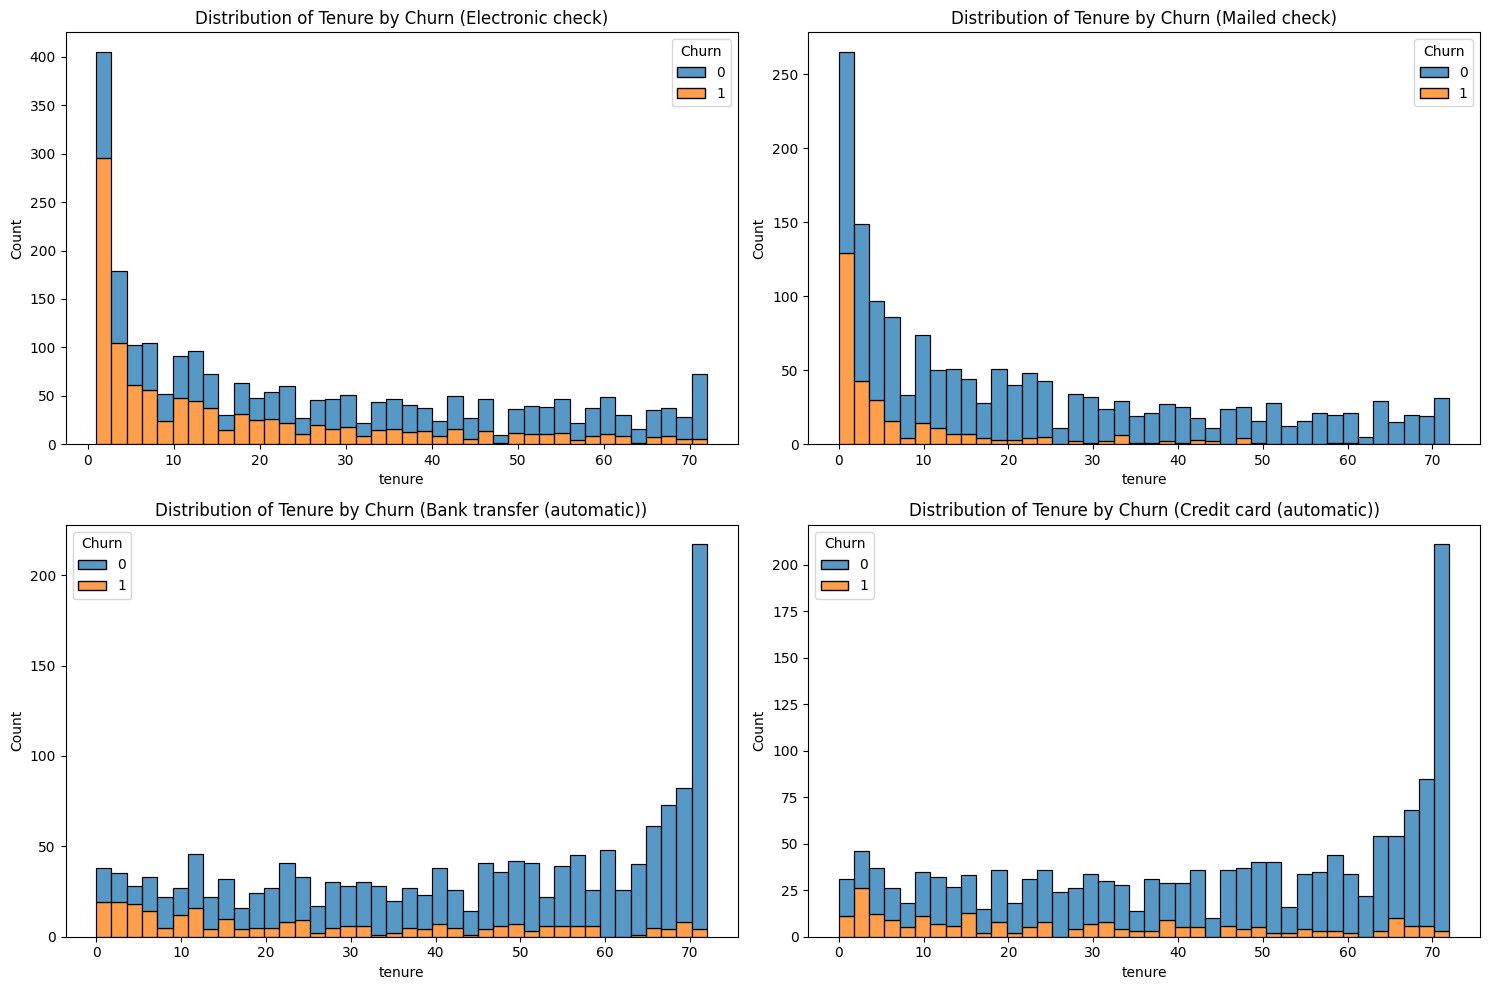

In [92]:
# distribution of tenure with bins 40 and churn, by all PaymentMethod on same canvas
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))
for i, method in enumerate(data['PaymentMethod'].unique()):
    sns.histplot(data=data[data['PaymentMethod'] == method], x='tenure', hue='Churn', multiple='stack', bins=40, ax=axes[i//2, i%2])
    axes[i//2, i%2].set_title(f'Distribution of Tenure by Churn ({method})')
plt.tight_layout()
plt.show()



In [93]:
# I see that churn is drastically lower for high tenure, and even lower for other subsets like Mailed check.


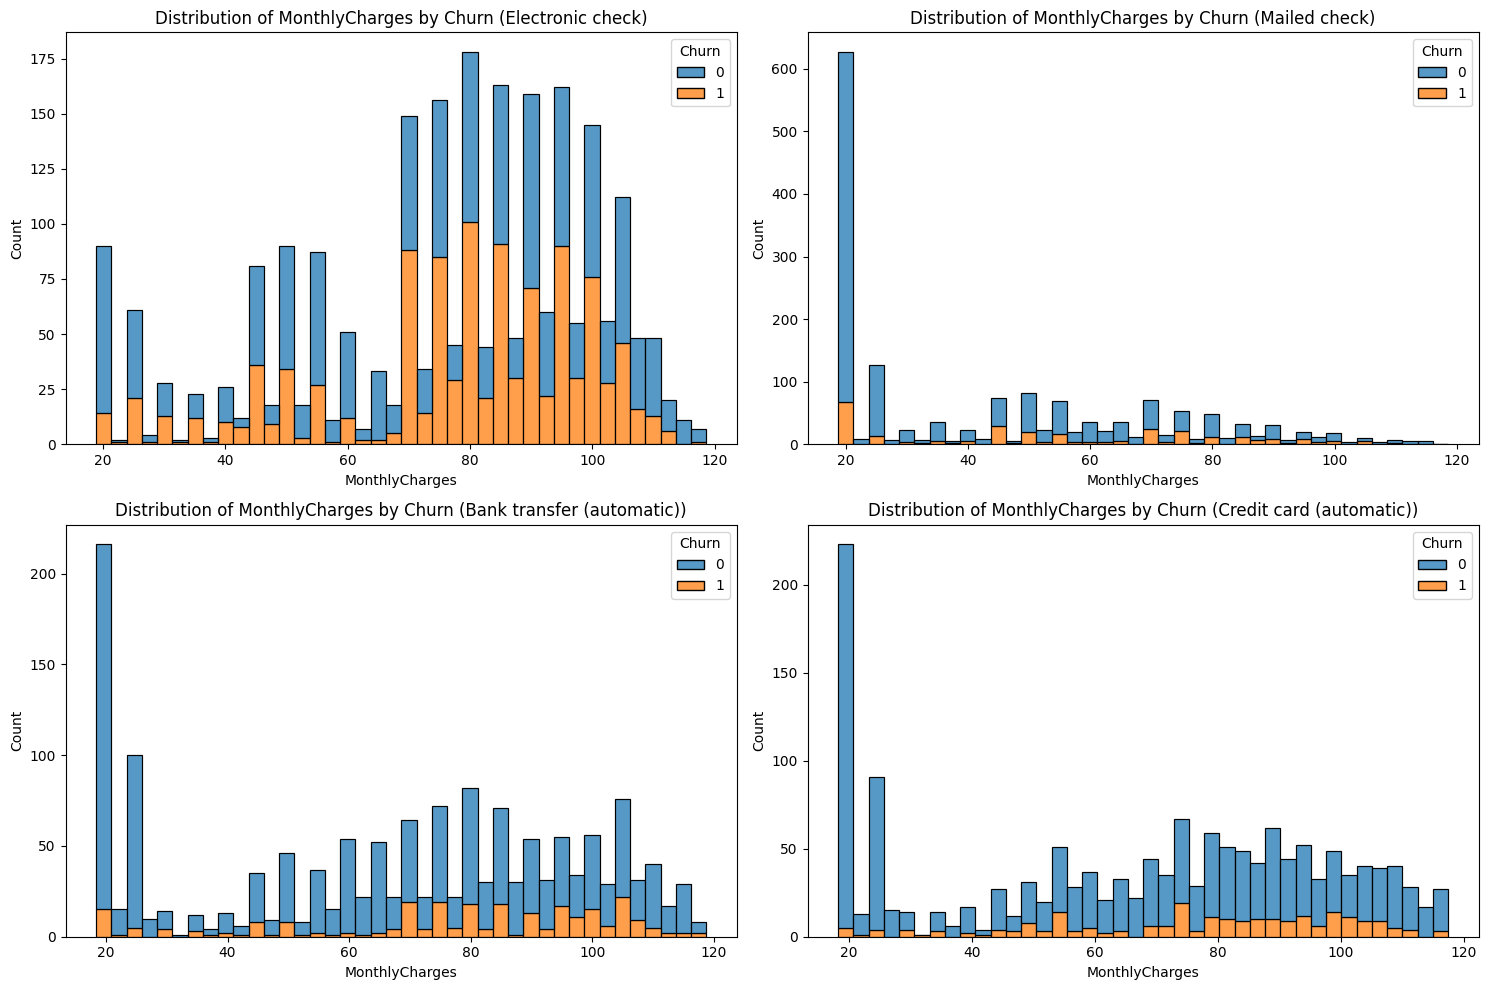

In [94]:
# distribution of MonthlyCharges with bins 40 and churn, by all PaymentMethod on same canvas
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))
for i, method in enumerate(data['PaymentMethod'].unique()):
    sns.histplot(data=data[data['PaymentMethod'] == method], x='MonthlyCharges', hue='Churn', multiple='stack', bins=40, ax=axes[i//2, i%2])
    axes[i//2, i%2].set_title(f'Distribution of MonthlyCharges by Churn ({method})')
plt.tight_layout()
plt.show()



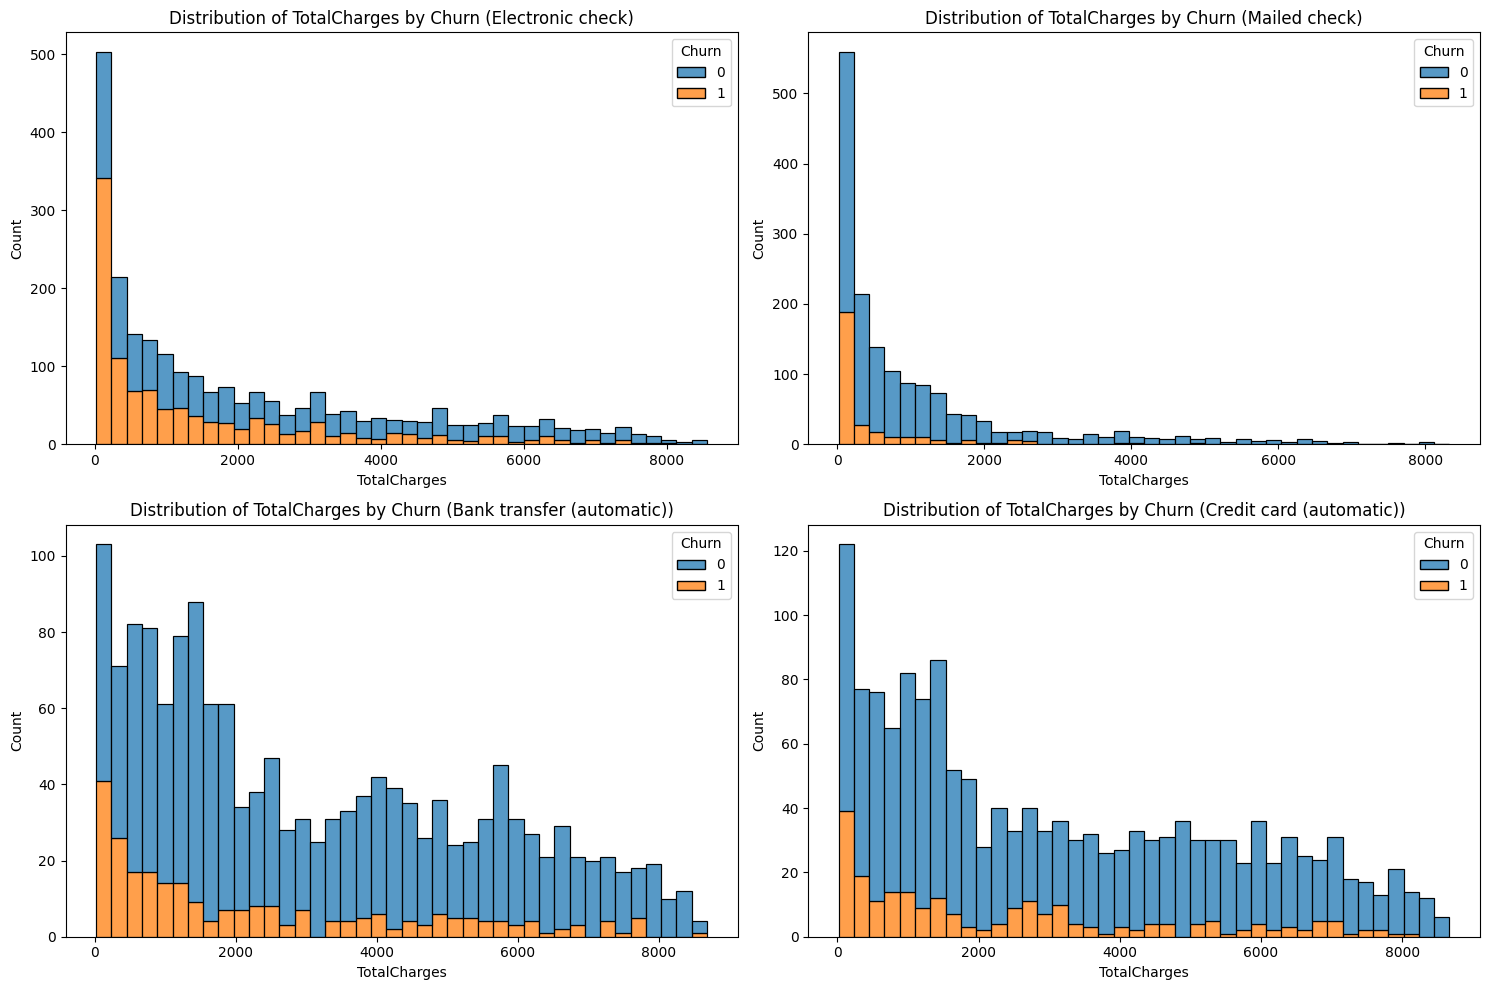

In [95]:
# distribution of TotalCharges with bins 40 and churn, by all PaymentMethod on same canvas
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))
for i, method in enumerate(data['PaymentMethod'].unique()):
    sns.histplot(data=data[data['PaymentMethod'] == method], x='TotalCharges', hue='Churn', multiple='stack', bins=40, ax=axes[i//2, i%2])
    axes[i//2, i%2].set_title(f'Distribution of TotalCharges by Churn ({method})')
plt.tight_layout()
plt.show()



In [96]:
#tenure_group
#Out of this EDA, I see that tenure is a very important feature, as well as MonthlyCharges and TotalCharges.

#I want to bin tenure
data["tenure"].describe()

# Create bins for tenure function
def tenure_bin(tenure):
    if tenure <= 12:
        return '0-12 Months'
    elif tenure <= 24:
        return '13-24 Months'
    elif tenure <= 48:
        return '25-48 Months'
    elif tenure <= 60:
        return '49-60 Months'
    else:
        return '61-72 Months'

data['tenure_group'] = data['tenure'].apply(tenure_bin)
data['tenure_group'].value_counts()

tenure_group
0-12 Months     2186
25-48 Months    1594
61-72 Months    1407
13-24 Months    1024
49-60 Months     832
Name: count, dtype: int64

In [97]:
#LogTerm
# Also want to Classify LongTerm customers as those with tenure > 24 months (looking at the plots, churn is very low after 24 months)
data['LongTerm'] = data['tenure'].apply(lambda x: 1 if x > 24 else 0)
data['LongTerm'].value_counts()

LongTerm
1    3833
0    3210
Name: count, dtype: int64

In [98]:
# Contract Contract Type (Ordinal Encoding)
contract_order = {
    'Month-to-month': 1,
    'One year': 2,
    'Two year': 3
}
data['Contract'] = data['Contract'].map(contract_order)
data['Contract'].value_counts()

Contract
1    3875
3    1695
2    1473
Name: count, dtype: int64

In [99]:
# feature engineering: AvailingInternetService
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group,LongTerm
0,Female,0,1,0,1,0,0,DSL,0,1,...,0,0,1,1,Electronic check,29.85,29.85,0,0-12 Months,0
1,Male,0,0,0,34,1,0,DSL,1,0,...,0,0,2,0,Mailed check,56.95,1889.50,0,25-48 Months,1
2,Male,0,0,0,2,1,0,DSL,1,1,...,0,0,1,1,Mailed check,53.85,108.15,1,0-12 Months,0
3,Male,0,0,0,45,0,0,DSL,1,0,...,0,0,2,0,Bank transfer (automatic),42.30,1840.75,0,25-48 Months,1
4,Female,0,0,0,2,1,0,Fiber optic,0,0,...,0,0,1,1,Electronic check,70.70,151.65,1,0-12 Months,0


In [100]:
#unique value count in MultipleLines column
data['MultipleLines'].value_counts()

MultipleLines
0    4072
1    2971
Name: count, dtype: int64

In [101]:
# unique value count in InternetService column
data['InternetService'].value_counts()

InternetService
Fiber optic    3096
DSL            2421
No             1526
Name: count, dtype: int64

In [102]:
#unique values in PhoneService column when InternetService is 'No'
data[data['InternetService'] == 'No']['PhoneService'].value_counts()

PhoneService
1    1526
Name: count, dtype: int64

In [103]:
#Availing internet Service
data['AvailingInternetService'] = data['InternetService'].apply(lambda x: 0 if x == 'No' else 1)
data['AvailingInternetService'].value_counts()

AvailingInternetService
1    5517
0    1526
Name: count, dtype: int64

In [104]:
#print columns and their unique values
for column in data.columns:
    print(f"{column}: {data[column].unique()} + {data[column].dtypes}")

gender: ['Female' 'Male'] + object
SeniorCitizen: [0 1] + int64
Partner: [1 0] + int64
Dependents: [0 1] + int64
tenure: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39] + int64
PhoneService: [0 1] + int64
MultipleLines: [0 1] + int64
InternetService: ['DSL' 'Fiber optic' 'No'] + object
OnlineSecurity: [0 1] + int64
OnlineBackup: [1 0] + int64
DeviceProtection: [0 1] + int64
TechSupport: [0 1] + int64
StreamingTV: [0 1] + int64
StreamingMovies: [0 1] + int64
Contract: [1 2 3] + int64
PaperlessBilling: [1 0] + int64
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)'] + object
MonthlyCharges: [29.85 56.95 53.85 ... 63.1  44.2  78.7 ] + float64
TotalCharges: [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ] + float64
Churn: [0 1] + int64
tenure_group: ['0-12 M

This reflectes that PhoneService when InternetService is 'No' is always "Yes"

The thought is to make all as services and make a feature of sum counts

A feature 
SumFeatures = (PhoneService + MultipleLines + AvailingInternetService + OnlineSecurity + OnlineBackup 
                + TechSupport + StreamingTV + StreamingMovies)

In [105]:
#NumServices
data['NumServices'] = (data['PhoneService'] + data['MultipleLines'] + data['AvailingInternetService'] +
                       data['OnlineSecurity'] + data['OnlineBackup'] + data['TechSupport'] +
                       data['StreamingTV'] + data['StreamingMovies'])
data['NumServices'].value_counts()


NumServices
1    1275
4    1110
5    1034
3     994
2     961
6     930
7     501
8     238
Name: count, dtype: int64

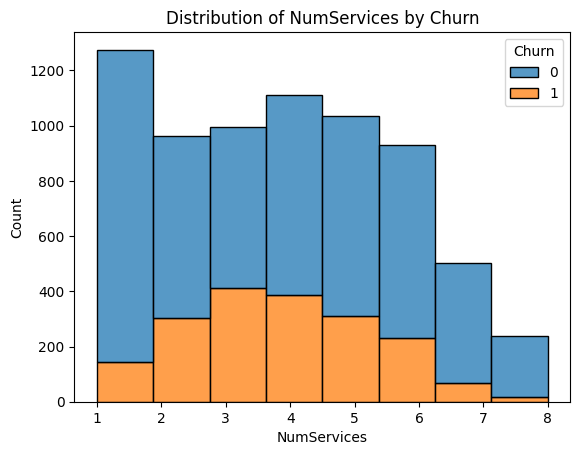

In [106]:
# Distribution of NumServices with Churn hue on same canvas
sns.histplot(data=data, x='NumServices', hue='Churn', multiple='stack', bins=8)
plt.title('Distribution of NumServices by Churn')
plt.show()

In [107]:
#max in monthly charges
data['MonthlyCharges'].max()

np.float64(118.75)

In [108]:
#min in monthly charges
data['MonthlyCharges'].min()

np.float64(18.25)

In [109]:
#min in TotalCharges
data['TotalCharges'].min()

np.float64(18.8)

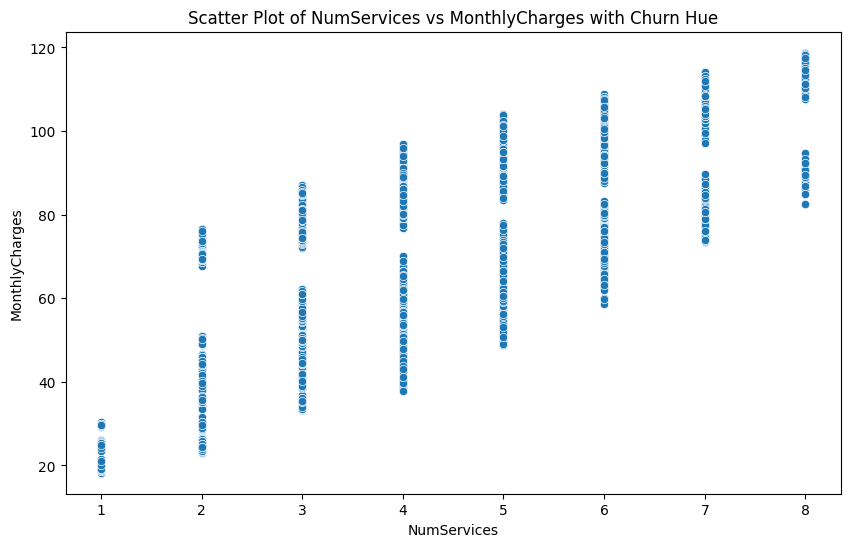

In [110]:
# what to create scatter plot of NumServices vs MonthlyCharges with Churn hue
plt.figure(figsize=(10, 6))
sns.scatterplot(x='NumServices', y='MonthlyCharges', data=data)
plt.title('Scatter Plot of NumServices vs MonthlyCharges with Churn Hue')
plt.show()

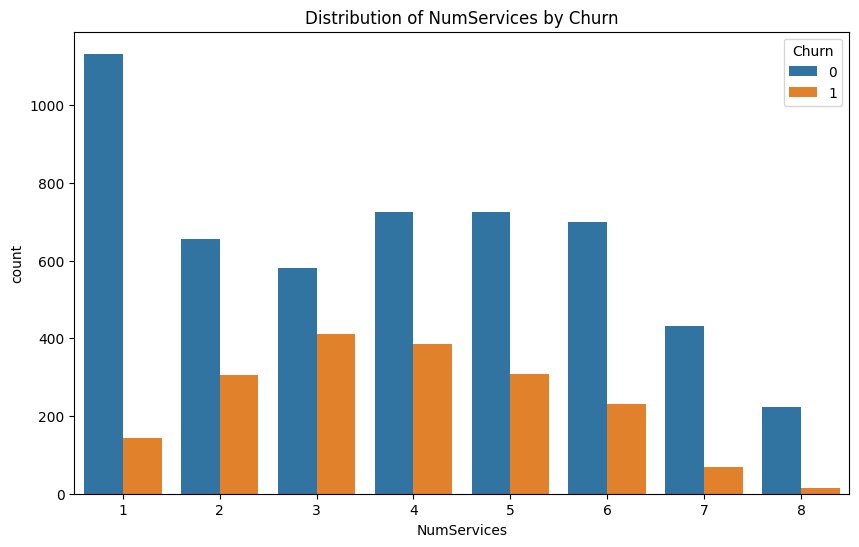

In [111]:
#distribution of NumServices by Churn
plt.figure(figsize=(10, 6))
sns.countplot(x='NumServices', hue='Churn', data=data)
plt.title('Distribution of NumServices by Churn')
plt.show()

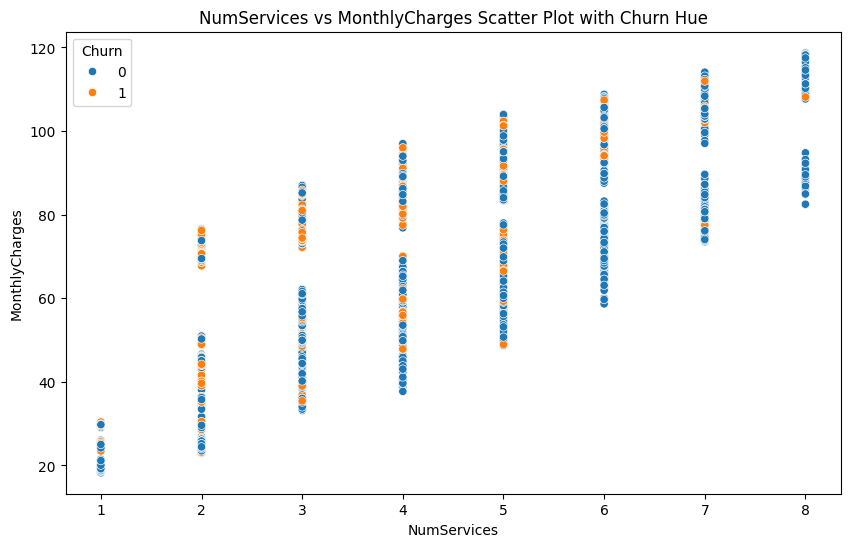

In [112]:
#NumService Vs MonthlyCharges scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='NumServices', y='MonthlyCharges', hue='Churn', data=data)
plt.title('NumServices vs MonthlyCharges Scatter Plot with Churn Hue')
plt.show()


Here I see some pure classes; so in my mind, I am thinking, a feature, MonthlyCharges/NumServices

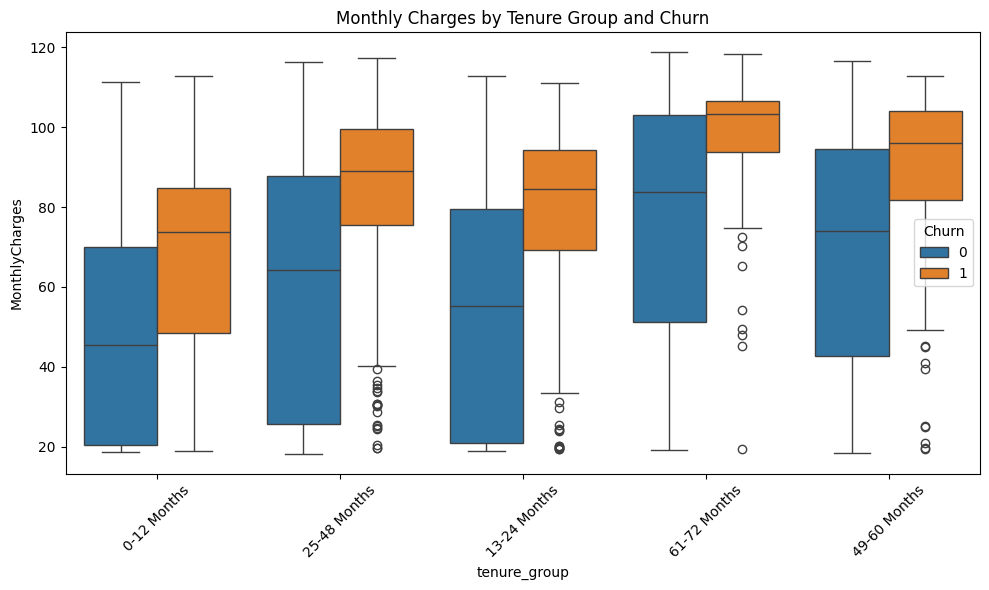

In [113]:
#want to see monthly charges by tenure group and churn
plt.figure(figsize=(10, 6))
sns.boxplot(x='tenure_group', y='MonthlyCharges', hue='Churn', data=data)
plt.title('Monthly Charges by Tenure Group and Churn')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

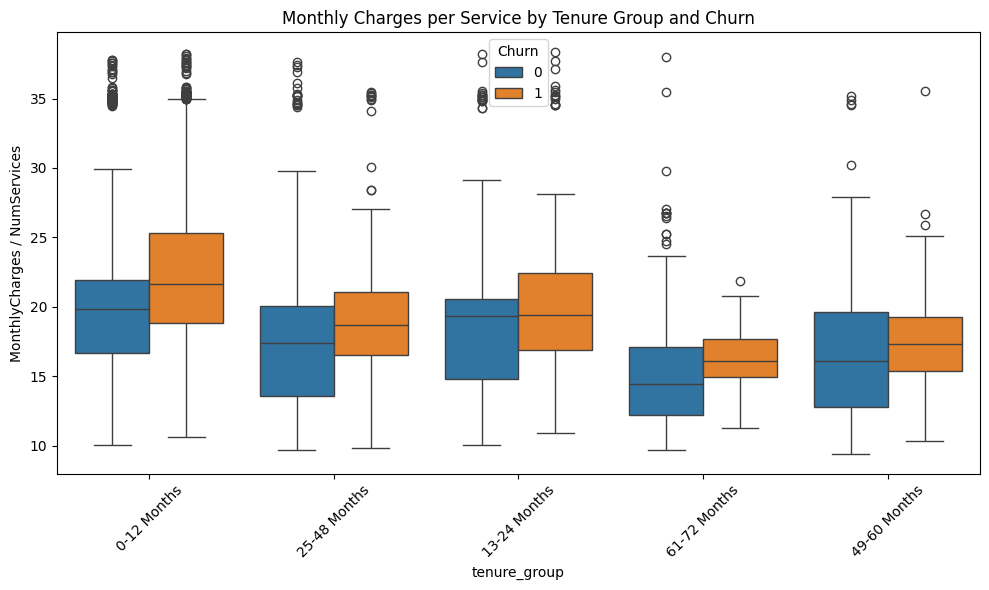

In [114]:
plt.figure(figsize=(10, 6))
sns.boxplot(
    x='tenure_group',
    y=data['MonthlyCharges'] / data['NumServices'],
    hue='Churn',
    data=data
)
plt.title('Monthly Charges per Service by Tenure Group and Churn')
plt.ylabel('MonthlyCharges / NumServices')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [115]:
# Average MonthlyCharges and TotalCharges by tenure_group and Churn
data.groupby(['tenure_group', 'Churn'])[['MonthlyCharges', 'TotalCharges']].median().round(2)

#shows a consistent high median for churn across all tenure groups, but especially high for the 0-12 months group where difference a lot

MonthlyCharges  TotalCharges
tenure_group Churn                              
0-12 Months  0               45.40        185.20
             1               73.85        164.50
13-24 Months 0               55.32        980.48
             1               84.52       1383.72
25-48 Months 0               64.20       2193.00
             1               89.10       2896.40
49-60 Months 0               74.00       4008.92
             1               95.98       5070.35
61-72 Months 0               83.78       5679.12
             1              103.40       6851.65

Clearly high paying clients in each group have a pattern to churn

75% or more of the people who Churned were paying higher than median MonthlyCharges, so if i just create a feature - 

MonthlyPerService = {       MonthlyCharges/NumServices          }

In [116]:
#feature engineering:
#AvgCharge: MonthlyCharges/NumServices
data['AvgCharge'] = data['MonthlyCharges'] / data['NumServices']

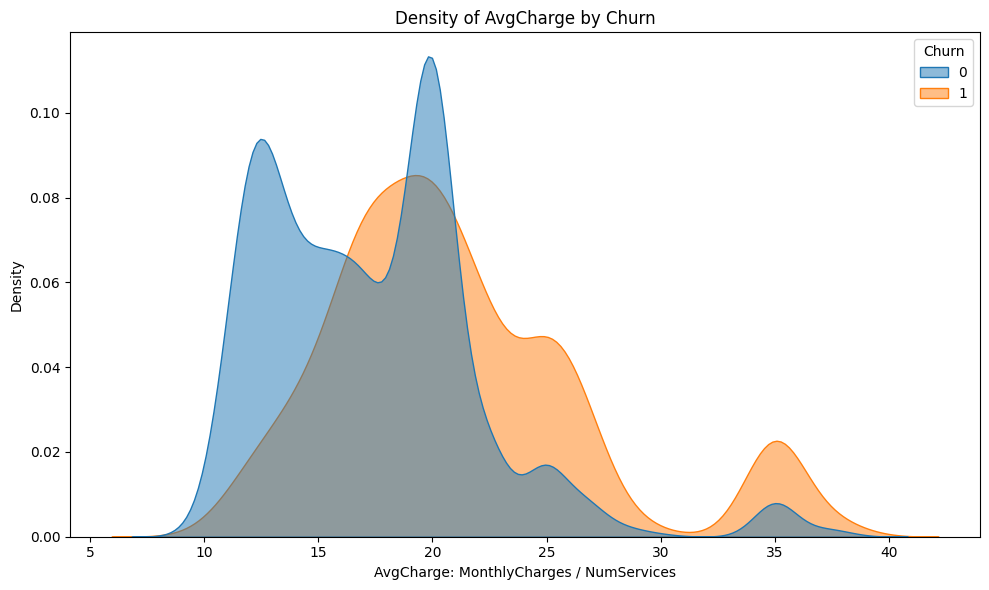

In [117]:
plt.figure(figsize=(10, 6))
sns.kdeplot(
    data=data,
    x=data['AvgCharge'],
    hue='Churn',
    common_norm=False,
    fill=True,
    alpha=0.5
)
plt.title('Density of AvgCharge by Churn')
plt.xlabel('AvgCharge: MonthlyCharges / NumServices')
plt.tight_layout()
plt.show()


In [118]:
#Dist by churn for all categorical columns
#for col in categorical_cols:
#    plt.figure(figsize=(8, 4))
#    sns.countplot(data=data, x=col, hue='Churn')
#    plt.title(f'Distribution of {col} by Churn')
#    plt.xticks(rotation=45)
#    plt.tight_layout()
#    plt.show()

Features Engineered

| Column Name              | Description                                         | Data Type   | Example Values              |
|:-------------------------|:----------------------------------------------------|:------------|:----------------------------|
| tenure_group             | Categorical grouping of tenure into ranges         | object      | 0-12 Months, 25-48 Months   |
| LongTerm                 | Binary flag: 1 if tenure > 24 months               | int         | 0, 1                        |
| AvailingInternetService  | Binary flag: 1 if InternetService ≠ 'No'           | int         | 0, 1                        |
| NumServices              | Count of availed services                          | int         | 1–8                         |
| MonthlyChargesPerService | MonthlyCharges divided by NumServices              | float       | e.g. 14.93, 28.4            |


In [119]:
data

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group,LongTerm,AvailingInternetService,NumServices,AvgCharge
0,Female,0,1,0,1,0,0,DSL,0,1,...,1,Electronic check,29.85,29.85,0,0-12 Months,0,1,2,14.925000
1,Male,0,0,0,34,1,0,DSL,1,0,...,0,Mailed check,56.95,1889.50,0,25-48 Months,1,1,3,18.983333
2,Male,0,0,0,2,1,0,DSL,1,1,...,1,Mailed check,53.85,108.15,1,0-12 Months,0,1,4,13.462500
3,Male,0,0,0,45,0,0,DSL,1,0,...,0,Bank transfer (automatic),42.30,1840.75,0,25-48 Months,1,1,3,14.100000
4,Female,0,0,0,2,1,0,Fiber optic,0,0,...,1,Electronic check,70.70,151.65,1,0-12 Months,0,1,2,35.350000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,1,1,24,1,1,DSL,1,0,...,1,Mailed check,84.80,1990.50,0,13-24 Months,0,1,7,12.114286
7039,Female,0,1,1,72,1,1,Fiber optic,0,1,...,1,Credit card (automatic),103.20,7362.90,0,61-72 Months,1,1,6,17.200000
7040,Female,0,1,1,11,0,0,DSL,1,0,...,1,Electronic check,29.60,346.45,0,0-12 Months,0,1,2,14.800000
7041,Male,1,1,0,4,1,1,Fiber optic,0,0,...,1,Mailed check,74.40,306.60,1,0-12 Months,0,1,3,24.800000


In [120]:
numeric_features = ['tenure', 'MonthlyCharges', 'TotalCharges', 'NumServices', 'AvgCharge']

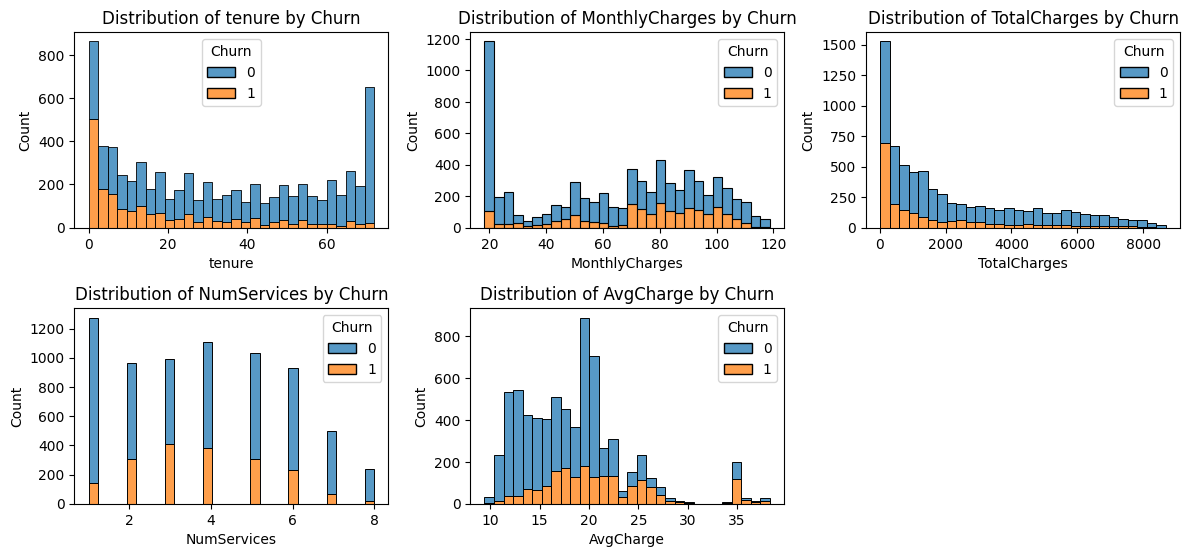

In [121]:
#distribution of numeric features on same canvas
plt.figure(figsize=(12, 8))
for col in numeric_features:
    plt.subplot(3, 3, numeric_features.index(col) + 1)
    sns.histplot(data=data, x=col, hue='Churn', multiple='stack', bins=30)
    plt.title(f'Distribution of {col} by Churn')
    plt.tight_layout()

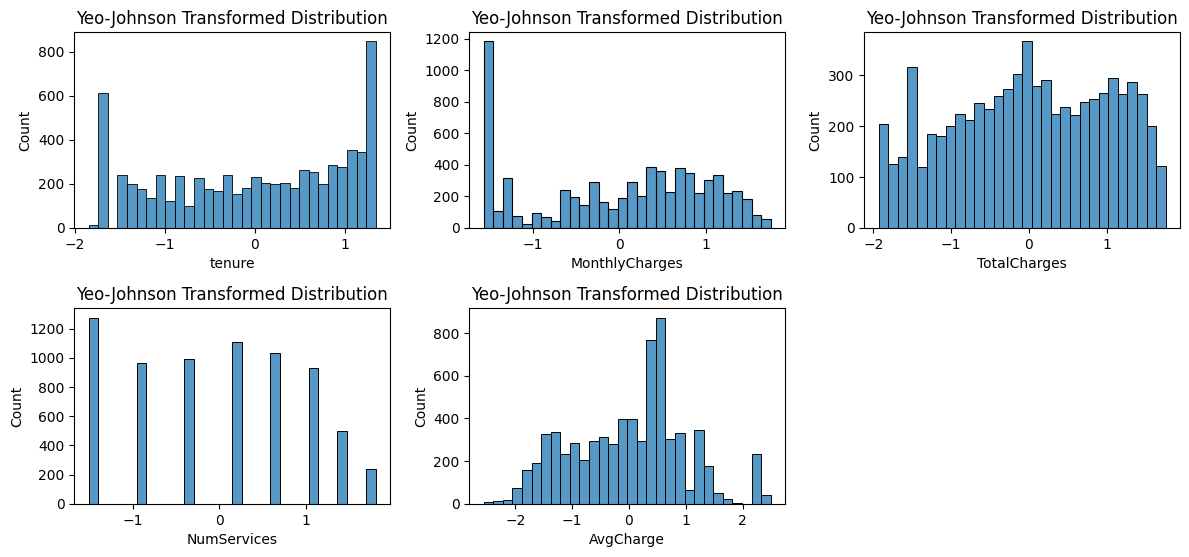

In [122]:
#creating data2 with Yeo-Johnson transformed numeric features and replacing original numeric features, plottting on one canvas
from sklearn.preprocessing import PowerTransformer
data2 = data.copy()
pt = PowerTransformer(method='yeo-johnson')
data2[numeric_features] = pt.fit_transform(data2[numeric_features])
data2.head()
plt.figure(figsize=(12, 8))
for col in numeric_features:
    plt.subplot(3, 3, numeric_features.index(col) + 1)
    sns.histplot(data=data2, x=col, multiple='stack', bins=30)
    plt.title(f'Yeo-Johnson Transformed Distribution')
    plt.tight_layout()
plt.show()

DATA MODELING STARTS HERE

In [123]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import (
    accuracy_score, confusion_matrix, classification_report,
    roc_auc_score, roc_curve
)

# Models
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier


Preprocessor Function

In [124]:
def get_preprocessor(X):
    categorical_features = ['gender', 'InternetService', 'PaymentMethod', 'tenure_group']
    numeric_features = [col for col in X.columns if col not in categorical_features]
    
    onehot = OneHotEncoder(handle_unknown='ignore', sparse_output=False, drop='first')
    
    preprocessor = ColumnTransformer([
        ('cat', onehot, categorical_features),
        ('num', 'passthrough', numeric_features)
    ])
    
    return preprocessor


In [125]:
# Target & Features
X = data2.drop(columns=['Churn'])
y = data2['Churn']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Preprocessor
preprocessor = get_preprocessor(X)


Evaluation Function (for any pipeline)

In [126]:
from sklearn.metrics import precision_recall_curve
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

def evaluate_model(pipe, model_name, X_test, y_test, X_train=None, y_train=None):
    classifier = pipe.named_steps['classifier']

    print(f"\n🔍 Evaluation: {model_name}")

    # Predictions
    y_pred = pipe.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"✅ Accuracy: {acc:.4f}")
    
    # Confusion matrix
    print("\n🧩 Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))

    # Classification report
    print("\n📄 Classification Report:")
    print(classification_report(y_test, y_pred))

    # Class balance in predictions
    unique, counts = np.unique(y_pred, return_counts=True)
    pred_dist = dict(zip(unique, counts))
    print("\n📊 Prediction Class Distribution:")
    for cls, cnt in pred_dist.items():
        print(f"Class {cls}: {cnt} predictions")

    # AUC / ROC Curve
    if hasattr(classifier, 'predict_proba'):
        y_proba = pipe.predict_proba(X_test)[:, 1]
        auc = roc_auc_score(y_test, y_proba)
        print(f"\n🎯 ROC AUC Score: {auc:.4f}")
        fpr, tpr, _ = roc_curve(y_test, y_proba)

        plt.figure(figsize=(6, 4))
        plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
        plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'ROC Curve - {model_name}')
        plt.legend()
        plt.grid(True)
        plt.show()

        # Precision-Recall Curve
        precision, recall, _ = precision_recall_curve(y_test, y_proba)
        plt.figure(figsize=(6, 4))
        plt.plot(recall, precision, label=model_name)
        plt.xlabel('Recall')
        plt.ylabel('Precision')
        plt.title(f'Precision-Recall Curve - {model_name}')
        plt.grid(True)
        plt.show()

    # Feature Importances
    if hasattr(classifier, 'feature_importances_'):
        feature_names = pipe.named_steps['preprocessor'].get_feature_names_out()
        importances = classifier.feature_importances_
        feat_imp = pd.Series(importances, index=feature_names).sort_values(ascending=False)
        
        print("\n📌 Top 10 Feature Importances:")
        print(feat_imp.head(10))

        feat_imp.head(10).plot(kind='barh')
        plt.title(f"Top 10 Feature Importances - {model_name}")
        plt.gca().invert_yaxis()
        plt.show()

    # Visualize Tree if it's a DecisionTreeClassifier
    if isinstance(classifier, DecisionTreeClassifier):
        print("\n🌳 Visualizing first 3 levels of the decision tree...")
        plt.figure(figsize=(20, 10))
        plot_tree(
            classifier, 
            filled=True, 
            feature_names=pipe.named_steps['preprocessor'].get_feature_names_out(), 
            class_names=True, 
            max_depth=3
        )
        plt.title("Decision Tree (First 3 Levels)")
        plt.show()

    # OOB Score for RF if available
    if hasattr(classifier, 'oob_score_') and classifier.oob_score:
        print(f"\n🧪 OOB Score (RF only): {classifier.oob_score_:.4f}")
    

    # Overfitting indicator: Compare train/test accuracy
    if X_train is not None and y_train is not None:
        train_acc = accuracy_score(y_train, pipe.predict(X_train))
        test_acc = accuracy_score(y_test, y_pred)
        print(f"\n🔍 Train Accuracy: {train_acc:.4f}")
        print(f"🔍 Test Accuracy:  {test_acc:.4f}")
        print(f"📉 Accuracy Gap (Train - Test): {train_acc - test_acc:.4f}")


# Baseline Decision Tree Model

In [127]:
# Initialize a basic Decision Tree model
clf = DecisionTreeClassifier(
    class_weight='balanced',        # Handle class imbalance
    criterion='gini',            # Use Gini impurity
    max_depth=6,                 # Limit depth to reduce overfitting
    min_samples_split=100,       # Require at least 100 samples to split a node
    min_samples_leaf=50,          # Each leaf must have at least 50 samples
    max_features='sqrt',         # Try sqrt(n_features) at each split (like in RF)
    random_state=42
)

# basic tuned Decision Tree model
clf2 = DecisionTreeClassifier(
    class_weight='balanced',        # Handle class imbalance
    criterion='entropy',            # Use entropy impurity
    max_depth=6,                 # Limit depth to reduce overfitting
    min_samples_split=100,       # Require at least 100 samples to split a node
    min_samples_leaf=50,          # Each leaf must have at least 50 samples
    max_features='sqrt',         # Try sqrt(n_features) at each split (like in RF)
    random_state=42
)

Baseline Decision Tree Model, So from My first DecisionTree; 



Accuracy: 0.7672

| Term                    | Value | Description                        |
| ----------------------- | ----- | ---------------------------------- |
| **TP** (True Positive)  | 194   | Predicted 1, and it was actually 1 |
| **TN** (True Negative)  | 887   | Predicted 0, and it was actually 0 |
| **FP** (False Positive) | 148   | Predicted 1, but it was actually 0 |
| **FN** (False Negative) | 180   | Predicted 0, but it was actually 1 |



Precision for Class 0 = (887)/(887+180) ~ 0.83
- Okayish

Precision for Class 1 = (194)/(194+148) ~ 0.57
- Not so good..hmm


Recall for Class 0 = 887/(887+148) ~ 86


Recall for Class 1 = 194/(194+180) ~ 52



🔍 Evaluation: DecisionTreeClassifier
✅ Accuracy: 0.7764

🧩 Confusion Matrix:

[[951  84]

 [231 143]]

📄 Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.92      0.86      1035
           1       0.63      0.38      0.48       374

    accuracy                           0.78      1409
   macro avg       0.72      0.65      0.67      1409
weighted avg       0.76      0.78      0.76      1409


📊 Prediction Class Distribution:
Class 0: 1182 predictions
Class 1: 227 predictions

🎯 ROC AUC Score: 0.8037


#======================================
# ✅ Random Forest Classifier 

In [128]:
# Random Forest Classifier 
clf3 = RandomForestClassifier(
    #criterion='gini',            # Use Gini impurity
    criterion='entropy',            # Use entropy impurity
    n_estimators=20000,         
    max_depth=15,
    min_samples_split=100,
    min_samples_leaf=10,
    max_features='sqrt',
    bootstrap=True,
    oob_score=True,
    random_state=42,
    n_jobs=-1
)

# Random Forest Classifier with balanced class weight 
clf4 = RandomForestClassifier(
    class_weight='balanced',        # Handle class imbalance
    #criterion='gini',            # Use Gini impurity
    criterion='entropy',            # Use entropy impurity
    n_estimators=20000,         
    max_depth=25,
    min_samples_split=50,
    min_samples_leaf=5,
    max_features='sqrt',
    bootstrap=True,
    oob_score=True,
    random_state=42,
    n_jobs=-1
)


# ✅ Gradient Boosting – clf5, clf6

In [129]:
#Gradient Boosting (Scikit-learn) – clf5, clf6

from sklearn.ensemble import GradientBoostingClassifier

# Gradient Boosting Classifier – Basic model
clf5 = GradientBoostingClassifier(
    loss='log_loss',              # Default loss for classification (log loss); use 'exponential' for AdaBoost-style loss
    learning_rate=0.1,            # Step size shrinkage to prevent overfitting (smaller = slower learning)
    n_estimators=2000,             # Number of boosting stages / trees
    subsample=0.8,                # Fraction of samples to train each tree (helps prevent overfitting)
    criterion='friedman_mse',     # Default split criterion (only option for now)
    min_samples_split=200,          # Minimum number of samples required to split an internal node
    min_samples_leaf=50,           # Minimum number of samples required to be at a leaf node
    min_weight_fraction_leaf=0.0, # Minimum weighted fraction of the sum total of weights required at a leaf
    max_depth=5,                  # Maximum depth of individual trees (limits model complexity)
    max_features=None,            # Number of features to consider when looking for the best split (None = all)
    max_leaf_nodes=None,          # Maximum number of leaf nodes per tree (None = unlimited)
    warm_start=False,             # Whether to reuse previous solution to add more estimators
    validation_fraction=0.1,      # Portion of training data to use for early stopping (used only if n_iter_no_change is set)
    n_iter_no_change=None,        # Stop training if validation score doesn’t improve for these many iterations
    tol=1e-4,                     # Tolerance for early stopping
    ccp_alpha=0.0,                # Complexity parameter for Minimal Cost-Complexity Pruning
    random_state=42
)

# Second Gradient Boosting Classifier –  tuned model
clf6 = GradientBoostingClassifier(
    loss='log_loss',              # Log loss
    learning_rate=0.01,           #adjust rate accordingly
    n_estimators=20000,             # More trees to compensate for lower learning rate
    criterion='friedman_mse',     # Only option for GBM currently
    min_samples_split=100,        # Require at least 100 samples to split
    min_samples_leaf=50,          # Each leaf must have at least 50 samples
    max_depth=20,                  # Deeper trees to capture more patterns
    max_features='sqrt',          # Consider sqrt(n_features) when splitting (helps reduce variance)
    max_leaf_nodes=None,          # Unlimited leaf nodes
    warm_start=False,             # Do not reuse solution
    validation_fraction=0.1,      # Use 10% of training set for early stopping
    n_iter_no_change=1000,          # Stop early if no improvement over 1000 rounds
    tol=1e-4,                     # Tolerance for early stopping
    ccp_alpha=0.0,                # No pruning
    random_state=42               # Reproducibility
)



from sklearn.utils import compute_sample_weight
# y_train is your training labels
sample_weights = compute_sample_weight(class_weight='balanced', y=y_train)


==========================================================================================

# ✅ XGBoost Classifier


Model clf7, clf8

In [130]:
# XGBoost Classifier – Basic model
from xgboost import XGBClassifier

clf7 = XGBClassifier(
    objective='binary:logistic',   # For binary classification; use 'multi:softprob' for multiclass
    n_estimators=1000,              # Number of boosting rounds
    learning_rate=0.1,             # Step size shrinkage
    max_depth=3,                   # Max depth of each tree
    subsample=0.8,                 # Row sampling
    colsample_bytree=0.8,          # Feature sampling
    use_label_encoder=False,       # Disable old label encoder
    eval_metric='logloss',         # Evaluation metric (log loss for binary)
    random_state=42,
    n_jobs=-1                      # Use all available cores
)

# XGBoost Classifier – Tuned model
# XGBoost Classifier – Tuned model
clf8 = XGBClassifier(
    objective='binary:logistic',
    n_estimators=5000,
    learning_rate=0.075,
    max_depth=4,
    min_child_weight=10,           # Minimum sum of instance weight (hessian) in a child
    subsample=0.7,
    colsample_bytree=0.7,
    gamma=1.0,                     # Minimum loss reduction to make a split (regularization)
    reg_alpha=0.1,                 # L1 regularization
    reg_lambda=1.0,                # L2 regularization
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42,
    n_jobs=-1
)


# ✅ LightGBM Classifiers

In [131]:
# LightGBM Classifier – Basic model
from lightgbm import LGBMClassifier

clf9 = LGBMClassifier(
    objective='binary',            # Use 'multiclass' for multiclass
    n_estimators=1000,
    learning_rate=0.1,
    max_depth=25,
    num_leaves=7,                  # 2^max_depth - 1 is a safe rule
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    n_jobs=-1
)

# LightGBM Classifier – Tuned model
clf10 = LGBMClassifier(
    objective='binary',
    n_estimators=10000,
    learning_rate=0.075,
    max_depth=25,
    num_leaves=31,                 # Must be < 2^max_depth
    min_child_samples=50,          # Minimum data in a leaf
    min_split_gain=0.01,           # Gain threshold to split
    subsample=0.7,
    colsample_bytree=0.7,
    reg_alpha=0.1,                 # L1 regularization
    reg_lambda=1.0,                # L2 regularization
    random_state=42,
    n_jobs=-1
)


# ✅ CatBoost Classifiers

In [132]:
# CatBoost Classifier – Basic model
from catboost import CatBoostClassifier

clf11 = CatBoostClassifier(
    iterations=1000,
    learning_rate=0.1,
    depth=3,
    loss_function='Logloss',
    verbose=0,                     # Silent mode
    random_seed=42
)


# CatBoost Classifier – Tuned model
clf12 = CatBoostClassifier(
    iterations=1000,
    learning_rate=0.01,
    depth=12,
    l2_leaf_reg=3.0,               # L2 regularization
    random_strength=1.0,           # Strength of randomness when selecting splits
    border_count=128,              # Number of splits for numeric features
    loss_function='Logloss',
    eval_metric='Logloss',
    bagging_temperature=1.0,       # Bayesian bootstrap (higher = more random)
    verbose=0,
    random_seed=42
)



============================================================================================================================================

Build models above this section concurrently and save

# Run Model here by Changing clf1, clf2, clf3

/Users/ob/Projects/.venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [12:48:21] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



🔍 Evaluation: XGBClassifier
✅ Accuracy: 0.7906

🧩 Confusion Matrix:
[[916 119]
 [176 198]]

📄 Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.89      0.86      1035
           1       0.62      0.53      0.57       374

    accuracy                           0.79      1409
   macro avg       0.73      0.71      0.72      1409
weighted avg       0.78      0.79      0.78      1409


📊 Prediction Class Distribution:
Class 0: 1092 predictions
Class 1: 317 predictions

🎯 ROC AUC Score: 0.8205


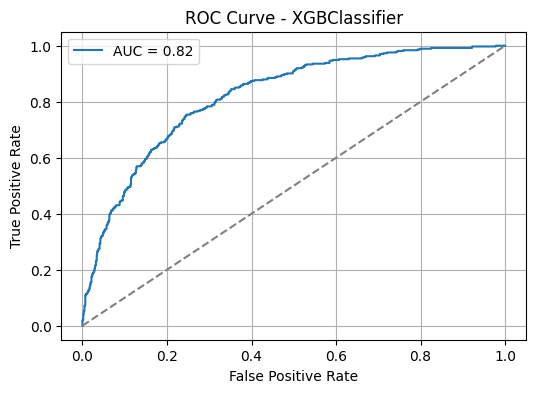

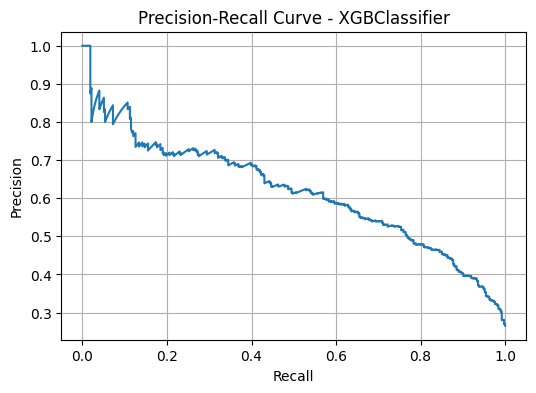


📌 Top 10 Feature Importances:
cat__InternetService_Fiber optic       0.209438
num__LongTerm                          0.175434
num__AvailingInternetService           0.161782
num__Contract                          0.096839
cat__InternetService_No                0.058318
cat__PaymentMethod_Electronic check    0.038704
num__StreamingMovies                   0.019925
num__tenure                            0.018300
num__StreamingTV                       0.016688
num__PaperlessBilling                  0.014241
dtype: float32


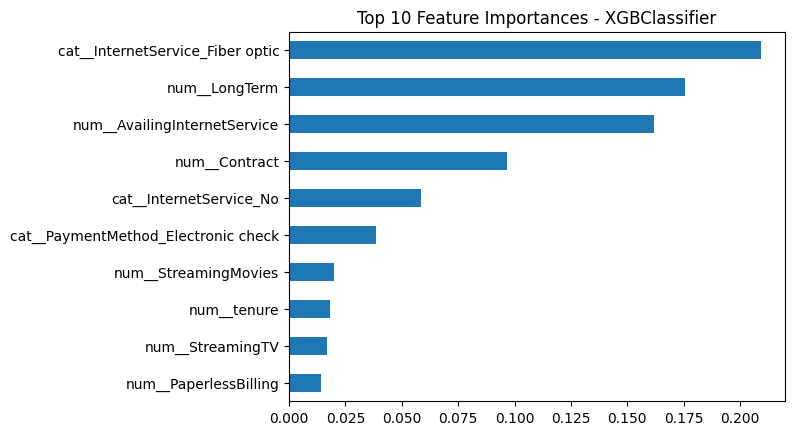

In [133]:
selected_clf = clf7   # 👈 change this to clf1, clf2, etc.

# Build pipeline
pipe = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', selected_clf)
])

# Fit pipeline
pipe.fit(X_train, y_train)
#pipe.fit(X_train, y_train, classifier__sample_weight=sample_weights)  # Uncomment to use for GBM ( doesnt treat class imbalance inherently )

# Extract the fitted classifier from the pipeline
fitted_clf = pipe.named_steps['classifier']

# Evaluate
evaluate_model(pipe, model_name=selected_clf.__class__.__name__, X_test=X_test, y_test=y_test)


# Tree Viz

In [134]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
import numpy as np

# Get the preprocessed feature names
feature_names = pipe.named_steps['preprocessor'].get_feature_names_out()


# Access all decision trees
all_trees = fitted_clf.estimators_

# Sum of absolute feature importances per tree
importance_scores = [np.sum(np.abs(tree.feature_importances_)) for tree in all_trees]

# Index of the most "important" tree
best_tree_index = np.argmax(importance_scores)
best_tree = all_trees[best_tree_index]

print(f"Most important tree index: {best_tree_index}")


plt.figure(figsize=(20, 10))
plot_tree(
    best_tree,
    feature_names=feature_names,
    class_names=['No Churn', 'Churn'],
    filled=True,
    rounded=True,
    max_depth=3,   # Limit depth for readability (increase if needed)
    fontsize=10
)
plt.title(f"Most Important Tree from Random Forest (Tree #{best_tree_index})")
plt.show()


AttributeError: 'XGBClassifier' object has no attribute 'estimators_'

In [135]:
# Get predicted probabilities for class 1 (churn)
y_proba = pipe.predict_proba(X_test)[:, 1]


# 📊 2. Visualize TP and FN vs Threshold

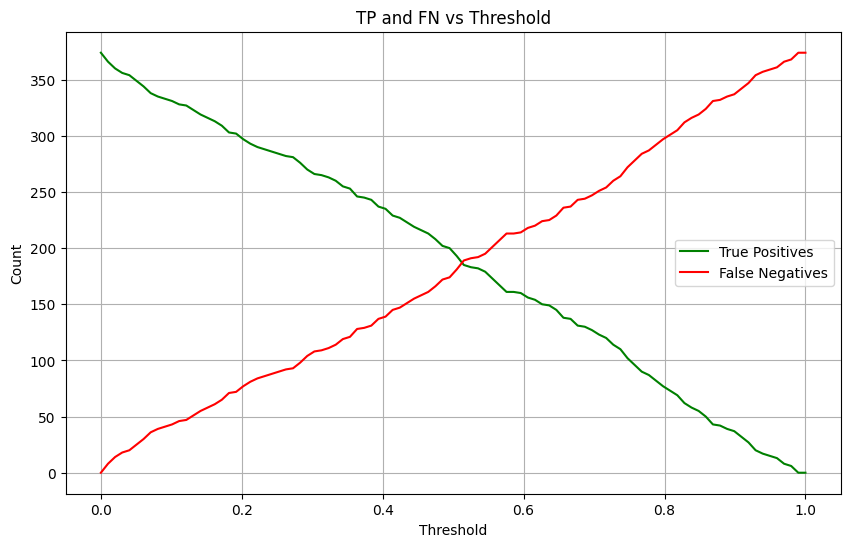

In [136]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

thresholds = np.linspace(0, 1, 100)
tp_list, fn_list = [], []

for thresh in thresholds:
    y_pred_thresh = (y_proba >= thresh).astype(int)
    cm = confusion_matrix(y_test, y_pred_thresh)
    
    tp = cm[1, 1]
    fn = cm[1, 0]
    
    tp_list.append(tp)
    fn_list.append(fn)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(thresholds, tp_list, label='True Positives', color='green')
plt.plot(thresholds, fn_list, label='False Negatives', color='red')
plt.xlabel("Threshold")
plt.ylabel("Count")
plt.title("TP and FN vs Threshold")
plt.legend()
plt.grid(True)
plt.show()


# 2. Threshold vs. F1 Score

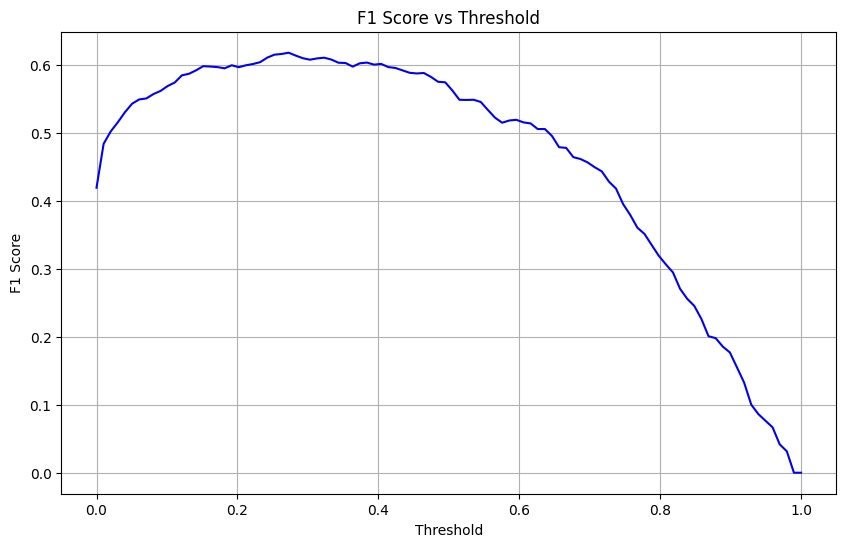

📌 Best threshold for F1 Score: 0.27


In [137]:
#also add label for the best threshold for F1 Score
import numpy as np
from sklearn.metrics import f1_score

f1_scores = []

for thresh in thresholds:
    y_pred_thresh = (y_proba >= thresh).astype(int)
    f1 = f1_score(y_test, y_pred_thresh)
    f1_scores.append(f1)

# Plot
plt.figure(figsize=(10, 6))
plt.plot(thresholds, f1_scores, color='blue')
plt.xlabel('Threshold')
plt.ylabel('F1 Score')
plt.title('F1 Score vs Threshold')
plt.grid(True)
plt.show()

# Best threshold
best_thresh = thresholds[np.argmax(f1_scores)]
print(f"📌 Best threshold for F1 Score: {best_thresh:.2f}")


# Extra 

In [912]:
y_proba

array([0.03084549, 0.68960621, 0.0816324 , ..., 0.12502024, 0.03379386,
       0.02192055], shape=(1409,))

📌 Best F1 Threshold: 0.273
📊 Best F1 Score: 0.618



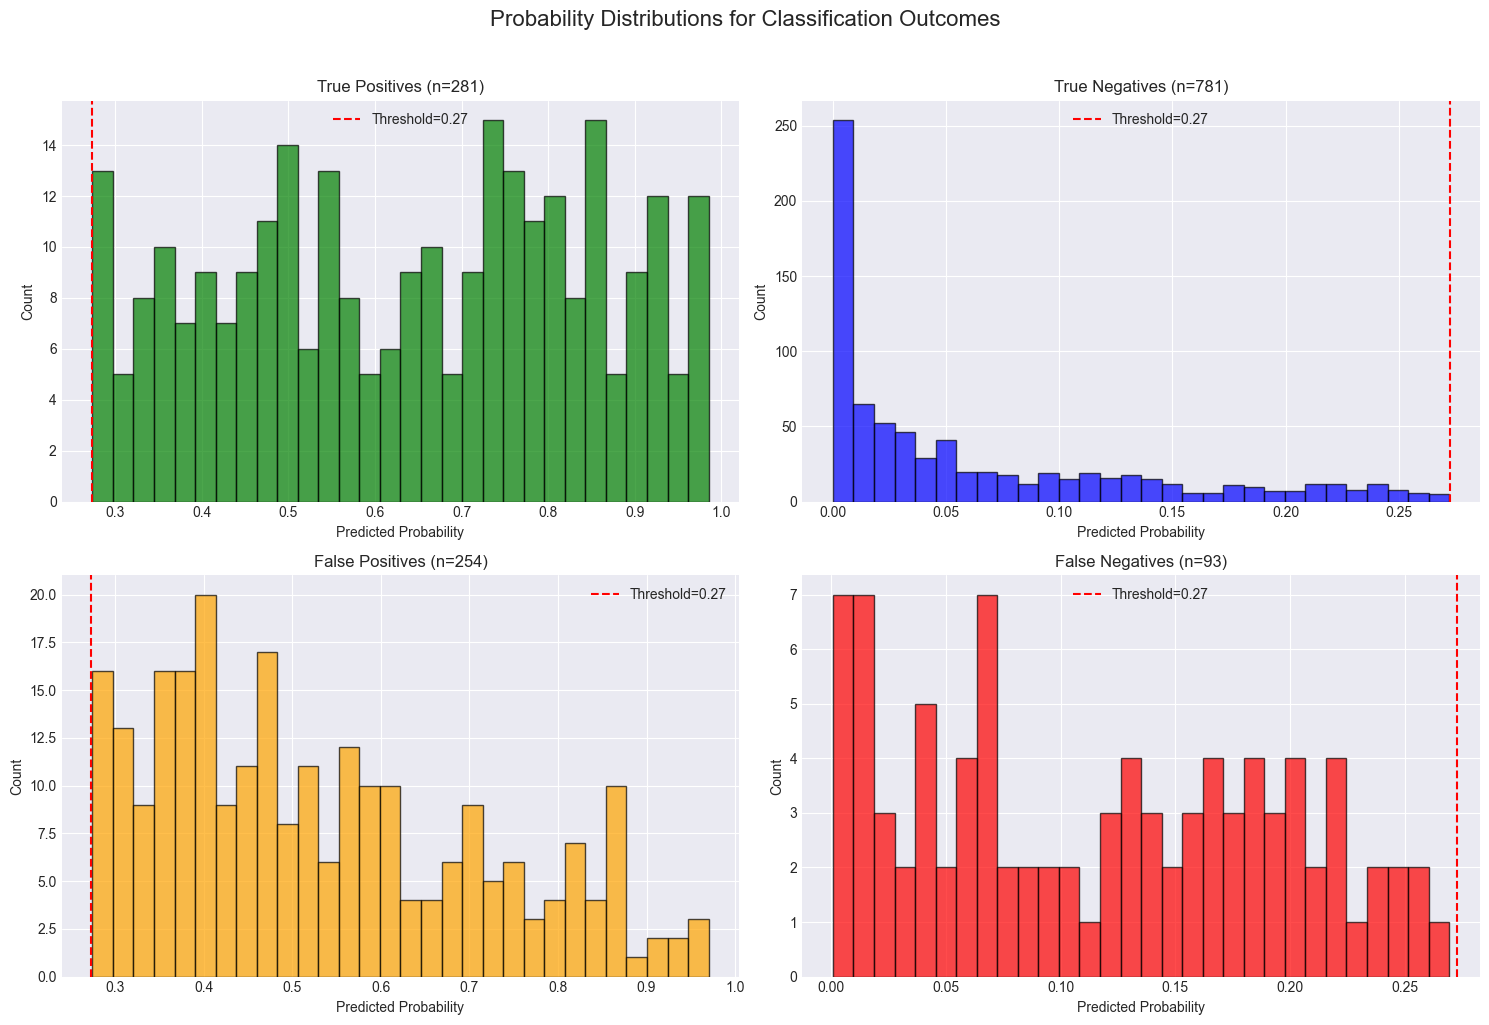

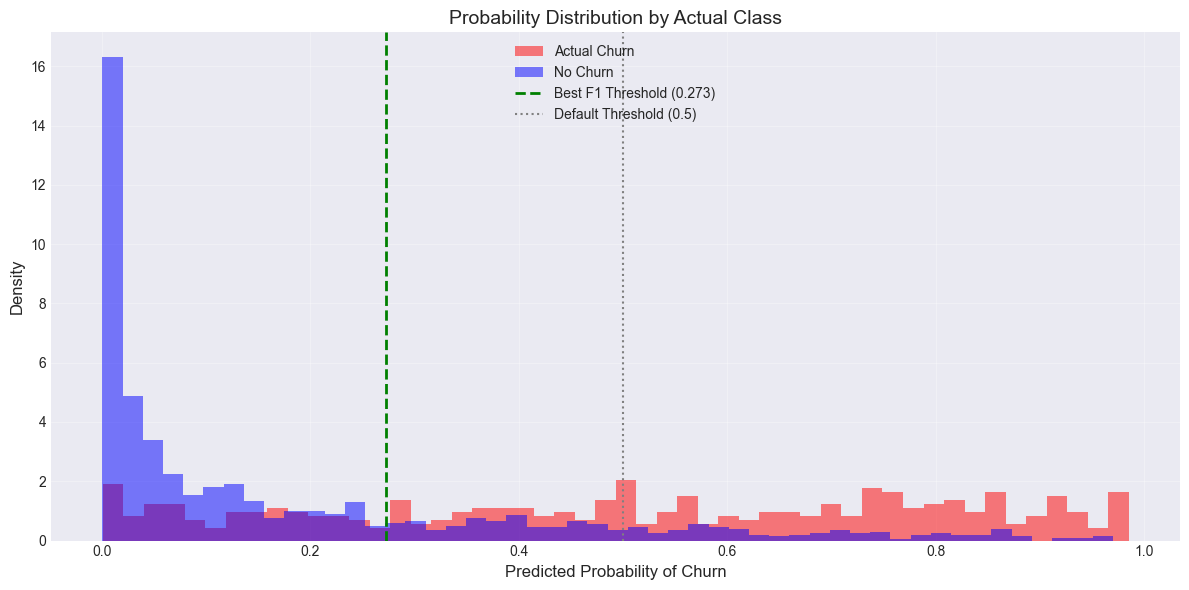

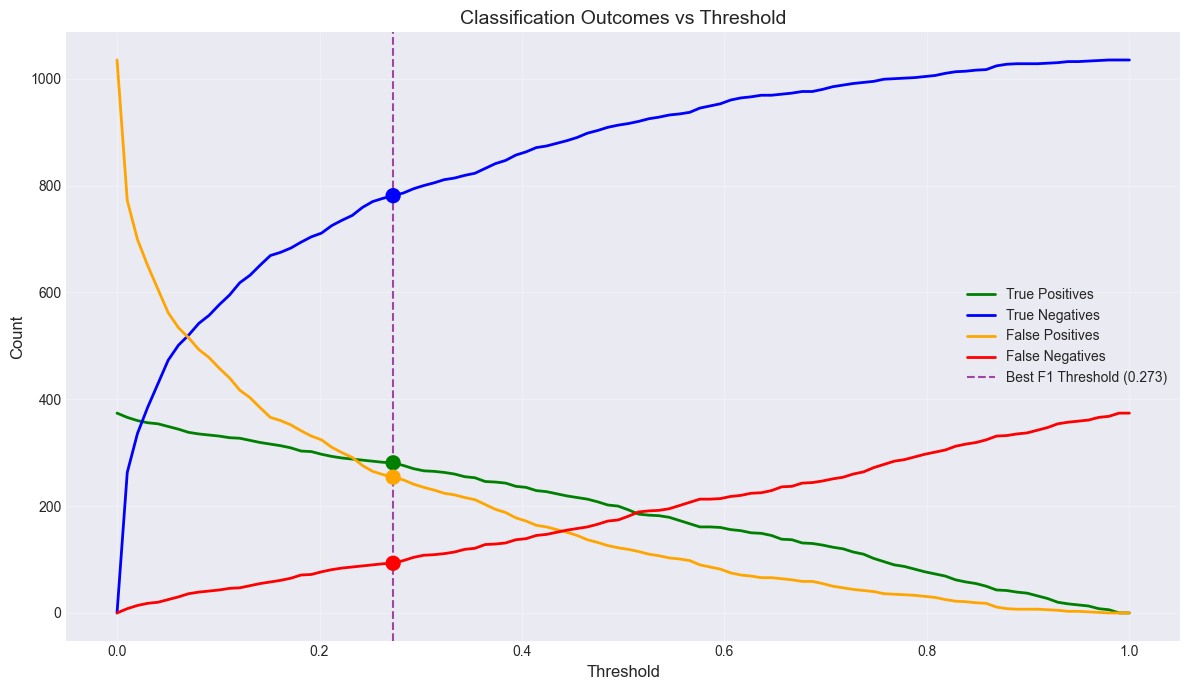

/var/folders/c0/4_nzbp_d3p7d9f_517mx6zlh0000gn/T/ipykernel_58780/2381471222.py:161: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax.boxplot(prob_data, labels=labels, patch_artist=True, showmeans=True)


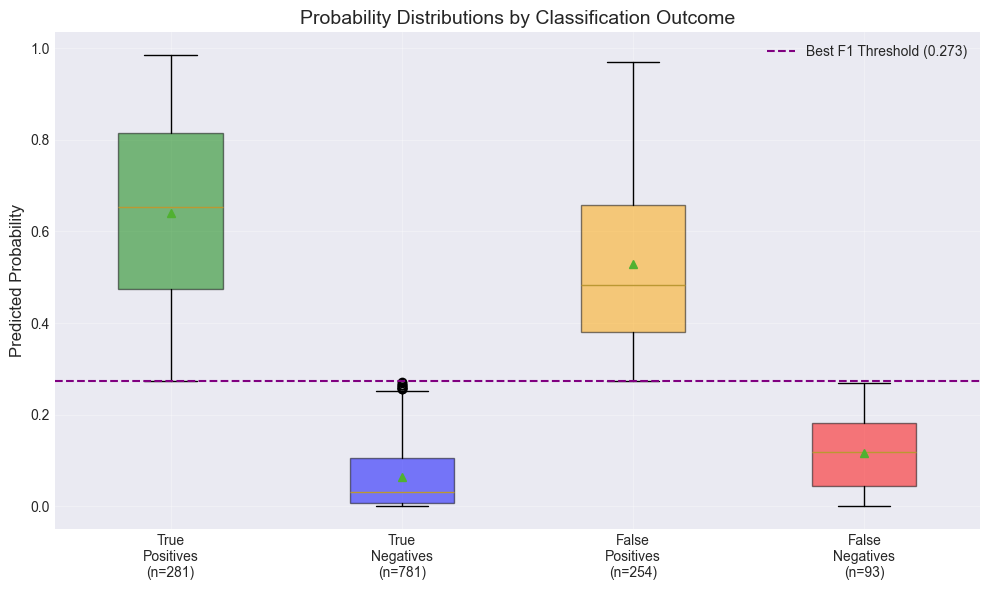


CLASSIFICATION METRICS AT BEST F1 THRESHOLD

Confusion Matrix:
                 Predicted No Churn | Predicted Churn
Actual No Churn:        781        |       254
Actual Churn:            93        |       281

📊 Key Statistics:
├─ True Positives:     281 ( 19.9%)
├─ True Negatives:     781 ( 55.4%)
├─ False Positives:    254 ( 18.0%)
└─ False Negatives:     93 (  6.6%)

🎯 Performance Metrics:
├─ Precision: 0.525
├─ Recall:    0.751
├─ F1 Score:  0.618
└─ Accuracy:  0.754

PROBABILITY STATISTICS BY ACTUAL CLASS
Actual Class  Mean Probability  Median Probability  Std Dev      Min      Max
    No Churn          0.177851            0.069843 0.228179 0.000158 0.970154
       Churn          0.509811            0.511103 0.290747 0.000705 0.985446

🔍 Separation Quality:
└─ Overlap in probability ranges: 97.8% of non-churners
   fall within churn probability range


In [138]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, f1_score
import pandas as pd

# Set style for better visualizations
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

# Calculate best F1 threshold first
thresholds = np.linspace(0, 1, 100)
f1_scores = []

for thresh in thresholds:
    y_pred_thresh = (y_proba >= thresh).astype(int)
    f1 = f1_score(y_test, y_pred_thresh)
    f1_scores.append(f1)

best_f1_thresh = thresholds[np.argmax(f1_scores)]
best_f1_score = max(f1_scores)

print(f"📌 Best F1 Threshold: {best_f1_thresh:.3f}")
print(f"📊 Best F1 Score: {best_f1_score:.3f}\n")

# ====================
# 1. PROBABILITY DISTRIBUTIONS BY OUTCOME
# ====================

fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Probability Distributions for Classification Outcomes', fontsize=16, y=1.02)

# Use the best threshold for classification
y_pred_best = (y_proba >= best_f1_thresh).astype(int)

# Separate probabilities by outcome
tp_probs = y_proba[(y_test == 1) & (y_pred_best == 1)]
tn_probs = y_proba[(y_test == 0) & (y_pred_best == 0)]
fp_probs = y_proba[(y_test == 0) & (y_pred_best == 1)]
fn_probs = y_proba[(y_test == 1) & (y_pred_best == 0)]

# Plot distributions
axes[0,0].hist(tp_probs, bins=30, alpha=0.7, color='green', edgecolor='black')
axes[0,0].axvline(best_f1_thresh, color='red', linestyle='--', label=f'Threshold={best_f1_thresh:.2f}')
axes[0,0].set_title(f'True Positives (n={len(tp_probs)})')
axes[0,0].set_xlabel('Predicted Probability')
axes[0,0].set_ylabel('Count')
axes[0,0].legend()

axes[0,1].hist(tn_probs, bins=30, alpha=0.7, color='blue', edgecolor='black')
axes[0,1].axvline(best_f1_thresh, color='red', linestyle='--', label=f'Threshold={best_f1_thresh:.2f}')
axes[0,1].set_title(f'True Negatives (n={len(tn_probs)})')
axes[0,1].set_xlabel('Predicted Probability')
axes[0,1].set_ylabel('Count')
axes[0,1].legend()

axes[1,0].hist(fp_probs, bins=30, alpha=0.7, color='orange', edgecolor='black')
axes[1,0].axvline(best_f1_thresh, color='red', linestyle='--', label=f'Threshold={best_f1_thresh:.2f}')
axes[1,0].set_title(f'False Positives (n={len(fp_probs)})')
axes[1,0].set_xlabel('Predicted Probability')
axes[1,0].set_ylabel('Count')
axes[1,0].legend()

axes[1,1].hist(fn_probs, bins=30, alpha=0.7, color='red', edgecolor='black')
axes[1,1].axvline(best_f1_thresh, color='red', linestyle='--', label=f'Threshold={best_f1_thresh:.2f}')
axes[1,1].set_title(f'False Negatives (n={len(fn_probs)})')
axes[1,1].set_xlabel('Predicted Probability')
axes[1,1].set_ylabel('Count')
axes[1,1].legend()

plt.tight_layout()
plt.show()

# ====================
# 2. OVERLAPPING DISTRIBUTIONS
# ====================

fig, ax = plt.subplots(figsize=(12, 6))

# Plot overlapping histograms
ax.hist(y_proba[y_test == 1], bins=50, alpha=0.5, label='Actual Churn', color='red', density=True)
ax.hist(y_proba[y_test == 0], bins=50, alpha=0.5, label='No Churn', color='blue', density=True)

# Add threshold lines
ax.axvline(best_f1_thresh, color='green', linestyle='--', linewidth=2, 
           label=f'Best F1 Threshold ({best_f1_thresh:.3f})')
ax.axvline(0.5, color='gray', linestyle=':', linewidth=1.5, 
           label='Default Threshold (0.5)')

ax.set_xlabel('Predicted Probability of Churn', fontsize=12)
ax.set_ylabel('Density', fontsize=12)
ax.set_title('Probability Distribution by Actual Class', fontsize=14)
ax.legend(loc='upper center')
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# ====================
# 3. CONFUSION MATRIX COUNTS VS THRESHOLD
# ====================

fig, ax = plt.subplots(figsize=(12, 7))

thresholds = np.linspace(0, 1, 100)
tp_list, tn_list, fp_list, fn_list = [], [], [], []

for thresh in thresholds:
    y_pred_thresh = (y_proba >= thresh).astype(int)
    cm = confusion_matrix(y_test, y_pred_thresh)
    
    tn_list.append(cm[0, 0])
    fp_list.append(cm[0, 1])
    fn_list.append(cm[1, 0])
    tp_list.append(cm[1, 1])

# Plot all confusion matrix elements
ax.plot(thresholds, tp_list, label='True Positives', color='green', linewidth=2)
ax.plot(thresholds, tn_list, label='True Negatives', color='blue', linewidth=2)
ax.plot(thresholds, fp_list, label='False Positives', color='orange', linewidth=2)
ax.plot(thresholds, fn_list, label='False Negatives', color='red', linewidth=2)

# Mark the best F1 threshold
ax.axvline(best_f1_thresh, color='purple', linestyle='--', alpha=0.7,
           label=f'Best F1 Threshold ({best_f1_thresh:.3f})')

# Add annotations at the best threshold
thresh_idx = np.argmin(np.abs(thresholds - best_f1_thresh))
ax.scatter([best_f1_thresh]*4, 
          [tp_list[thresh_idx], tn_list[thresh_idx], fp_list[thresh_idx], fn_list[thresh_idx]], 
          s=100, zorder=5, color=['green', 'blue', 'orange', 'red'])

ax.set_xlabel('Threshold', fontsize=12)
ax.set_ylabel('Count', fontsize=12)
ax.set_title('Classification Outcomes vs Threshold', fontsize=14)
ax.legend(loc='center right')
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# ====================
# 4. PROBABILITY BOXPLOT BY OUTCOME
# ====================

fig, ax = plt.subplots(figsize=(10, 6))

# Prepare data for boxplot
prob_data = []
labels = []

for probs, label, color in [(tp_probs, 'True\nPositives', 'green'),
                             (tn_probs, 'True\nNegatives', 'blue'),
                             (fp_probs, 'False\nPositives', 'orange'),
                             (fn_probs, 'False\nNegatives', 'red')]:
    if len(probs) > 0:
        prob_data.append(probs)
        labels.append(f'{label}\n(n={len(probs)})')

# Create boxplot
bp = ax.boxplot(prob_data, labels=labels, patch_artist=True, showmeans=True)

# Color the boxes
colors = ['green', 'blue', 'orange', 'red']
for patch, color in zip(bp['boxes'], colors[:len(prob_data)]):
    patch.set_facecolor(color)
    patch.set_alpha(0.5)

# Add threshold line
ax.axhline(best_f1_thresh, color='purple', linestyle='--', 
          label=f'Best F1 Threshold ({best_f1_thresh:.3f})')

ax.set_ylabel('Predicted Probability', fontsize=12)
ax.set_title('Probability Distributions by Classification Outcome', fontsize=14)
ax.legend()
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# ====================
# 5. PERFORMANCE METRICS TABLE
# ====================

print("\n" + "="*60)
print("CLASSIFICATION METRICS AT BEST F1 THRESHOLD")
print("="*60)

cm_best = confusion_matrix(y_test, y_pred_best)
total = np.sum(cm_best)

print(f"\nConfusion Matrix:")
print(f"                 Predicted No Churn | Predicted Churn")
print(f"Actual No Churn:     {cm_best[0,0]:6d}        |    {cm_best[0,1]:6d}")
print(f"Actual Churn:        {cm_best[1,0]:6d}        |    {cm_best[1,1]:6d}")

print(f"\n📊 Key Statistics:")
print(f"├─ True Positives:  {cm_best[1,1]:6d} ({cm_best[1,1]/total*100:5.1f}%)")
print(f"├─ True Negatives:  {cm_best[0,0]:6d} ({cm_best[0,0]/total*100:5.1f}%)")
print(f"├─ False Positives: {cm_best[0,1]:6d} ({cm_best[0,1]/total*100:5.1f}%)")
print(f"└─ False Negatives: {cm_best[1,0]:6d} ({cm_best[1,0]/total*100:5.1f}%)")

# Calculate additional metrics
precision = cm_best[1,1] / (cm_best[1,1] + cm_best[0,1]) if (cm_best[1,1] + cm_best[0,1]) > 0 else 0
recall = cm_best[1,1] / (cm_best[1,1] + cm_best[1,0]) if (cm_best[1,1] + cm_best[1,0]) > 0 else 0
accuracy = (cm_best[1,1] + cm_best[0,0]) / total

print(f"\n🎯 Performance Metrics:")
print(f"├─ Precision: {precision:.3f}")
print(f"├─ Recall:    {recall:.3f}")
print(f"├─ F1 Score:  {best_f1_score:.3f}")
print(f"└─ Accuracy:  {accuracy:.3f}")

# ====================
# 6. PROBABILITY STATISTICS BY ACTUAL CLASS
# ====================

print("\n" + "="*60)
print("PROBABILITY STATISTICS BY ACTUAL CLASS")
print("="*60)

prob_stats = pd.DataFrame({
    'Actual Class': ['No Churn', 'Churn'],
    'Mean Probability': [y_proba[y_test == 0].mean(), y_proba[y_test == 1].mean()],
    'Median Probability': [np.median(y_proba[y_test == 0]), np.median(y_proba[y_test == 1])],
    'Std Dev': [y_proba[y_test == 0].std(), y_proba[y_test == 1].std()],
    'Min': [y_proba[y_test == 0].min(), y_proba[y_test == 1].min()],
    'Max': [y_proba[y_test == 0].max(), y_proba[y_test == 1].max()]
})

print(prob_stats.to_string(index=False))

# Calculate overlap percentage
overlap_zone = np.sum((y_proba[y_test == 0] > y_proba[y_test == 1].min()) & 
                      (y_proba[y_test == 0] < y_proba[y_test == 1].max()))
overlap_pct = overlap_zone / len(y_proba[y_test == 0]) * 100

print(f"\n🔍 Separation Quality:")
print(f"└─ Overlap in probability ranges: {overlap_pct:.1f}% of non-churners")
print(f"   fall within churn probability range")

# Grid Search for Hyperparameter Tuning (Random Forest as example) ###

In [942]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score
import pandas as pd
import numpy as np


# Define the Model Search Class

In [943]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

class ModelSearcher:
    def __init__(self, model, param_grid, preprocessor, model_name=None):
        """
        model: sklearn-like classifier
        param_grid: dict of hyperparameters to search
        preprocessor: your preprocessing pipeline (e.g., ColumnTransformer)
        model_name: optional string name
        """
        self.model = model
        self.param_grid = param_grid
        self.preprocessor = preprocessor
        self.model_name = model_name or model.__class__.__name__
        self.pipeline = Pipeline([
            ('preprocessor', self.preprocessor),
            ('classifier', self.model)
        ])
        self.grid_search = None
    
    def run_search(self, X_train, y_train, scoring='accuracy', cv=5, n_jobs=-1, verbose=1):
        """Runs grid search using cross-validation."""
        self.grid_search = GridSearchCV(
            self.pipeline,
            param_grid=self.param_grid,
            scoring=scoring,
            cv=cv,
            n_jobs=n_jobs,
            verbose=verbose
        )
        print(f"\n🔍 Running GridSearchCV for {self.model_name}...\n")
        self.grid_search.fit(X_train, y_train)
        print("✅ Done.\n")

    def report_results(self, X_test, y_test):
        """Prints best parameters and test performance."""
        print(f"\n📊 Best Parameters for {self.model_name}:")
        print(self.grid_search.best_params_)

        best_model = self.grid_search.best_estimator_
        y_pred = best_model.predict(X_test)

        print("\n🧪 Classification Report:")
        print(classification_report(y_test, y_pred))

        acc = accuracy_score(y_test, y_pred)
        print(f"🎯 Accuracy: {acc:.4f}")
        
        return {
            'model': self.model_name,
            'best_params': self.grid_search.best_params_,
            'accuracy': acc
        }


# ✅ Parameter Grids for All Models (clf1 to clf12)

In [945]:
# Reusable common parameter values
small_lr = [0.03, 0.1]
large_lr = [0.1, 0.05, 0.01, 0.05]
depth_range = [3, 4, 5, 7, 10, 15, 20, 25]
leaf_samples = [10, 20, 50]
split_samples = [10, 50, 100, 200]

# Param grids per classifier
param_grids = {
    #clf
    "DecisionTreeClassifier_gini": {
        "classifier__criterion": ["gini"],
        "classifier__max_depth": [4, 6, 10],
        "classifier__min_samples_split": split_samples,
        "classifier__min_samples_leaf": leaf_samples,
        "classifier__max_features": ["sqrt", None],
        "classifier__class_weight": [None, "balanced"]
    },
    #clf2
    "DecisionTreeClassifier_entropy": {
        "classifier__criterion": ["entropy"],
        "classifier__max_depth": [4, 6, 10],
        "classifier__min_samples_split": split_samples,
        "classifier__min_samples_leaf": leaf_samples,
        "classifier__max_features": ["sqrt", None],
        "classifier__class_weight": [None, "balanced"]
    },
    #clf3
    "RandomForestClassifier_basic": {
        "classifier__n_estimators": [1000, 5000, 10000],
        "classifier__max_depth": [10, 15, 20, 25],
        "classifier__min_samples_split": split_samples,
        "classifier__min_samples_leaf": leaf_samples,
        "classifier__max_features": ["sqrt"],
        "classifier__bootstrap": [True],
        "classifier__oob_score": [True],
        "classifier__criterion": ["gini", "entropy"]
    },
    #clf4
    "RandomForestClassifier_balanced": {
        "classifier__n_estimators": [1000, 5000, 10000],
        "classifier__max_depth": [5, 7, 10, 15, 25],
        "classifier__min_samples_split": [10, 50, 100],
        "classifier__min_samples_leaf": [5, 10],
        "classifier__max_features": ["sqrt"],
        "classifier__bootstrap": [True],
        "classifier__oob_score": [True],
        "classifier__criterion": ["entropy"],
        "classifier__class_weight": ["balanced"]
    },
    #clf5
    "GradientBoostingClassifier_basic": {
        "classifier__n_estimators": [2000, 5000, 10000],
        "classifier__learning_rate": small_lr,
        "classifier__max_depth": depth_range,
        "classifier__subsample": [0.8],
        "classifier__min_samples_split": split_samples,
        "classifier__min_samples_leaf": leaf_samples
    },
    #clf6
    "GradientBoostingClassifier_tuned": {
        "classifier__n_estimators": [2000, 5000, 10000],
        "classifier__learning_rate": large_lr,
        "classifier__max_depth": [10, 25],
        "classifier__max_features": ["sqrt"],
        "classifier__min_samples_split": split_samples,
        "classifier__min_samples_leaf": leaf_samples,
        "classifier__validation_fraction": [0.1],
        "classifier__n_iter_no_change": [10]
    },
    #clf7
    "XGBClassifier_basic": {
        "classifier__n_estimators": [1000, 3000, 5000, 10000],
        "classifier__learning_rate": small_lr,
        "classifier__max_depth": depth_range,
        "classifier__subsample": [0.8],
        "classifier__colsample_bytree": [0.8]
    },
    #clf8
    "XGBClassifier_tuned": {
        "classifier__n_estimators": [3000, 5000],
        "classifier__learning_rate": large_lr,
        "classifier__max_depth": [5, 7, 10, 15, 20],
        "classifier__subsample": [0.7, 0.9],
        "classifier__colsample_bytree": [0.7, 0.9],
        "classifier__gamma": [0, 0.5, 1.0],
        "classifier__reg_alpha": [0.1, 0.5],
        "classifier__reg_lambda": [1.0]
    },
    #clf9
    "LGBMClassifier_basic": {
        "classifier__n_estimators": [1000, 3000, 5000, 10000],
        "classifier__learning_rate": small_lr,
        "classifier__max_depth": [3, 5],
        "classifier__num_leaves": [7, 15],
        "classifier__subsample": [0.8],
        "classifier__colsample_bytree": [0.8]
    },
    #clf10
    "LGBMClassifier_tuned": {
        "classifier__n_estimators": [1000, 5000, 10000],
        "classifier__learning_rate": large_lr,
        "classifier__max_depth": [6],
        "classifier__num_leaves": [31],
        "classifier__min_child_samples": [20, 50],
        "classifier__min_split_gain": [0.01],
        "classifier__subsample": [0.7],
        "classifier__colsample_bytree": [0.7],
        "classifier__reg_alpha": [0.1],
        "classifier__reg_lambda": [1.0]
    },
    #clf11
    "CatBoostClassifier_basic": {
        "classifier__iterations": [100, 500, 1000, 3000],
        "classifier__learning_rate": small_lr,
        "classifier__depth": [3, 5, 7, 10],
        "classifier__l2_leaf_reg": [1, 3, 5]
    },
    #clf12
    "CatBoostClassifier_tuned": {
        "classifier__iterations": [100, 500],
        "classifier__learning_rate": large_lr,
        "classifier__depth": [10, 12, 15],
        "classifier__l2_leaf_reg": [3.0],
        "classifier__bagging_temperature": [0.5, 1.0],
        "classifier__random_strength": [1.0]
    }
}


# Run the Search
# Select classifier and param grid for individual Models

In [946]:
from sklearn.model_selection import GridSearchCV

# Select the classifier and parameter grid
selected_clf = clf7  # 👈 Change this to any of clf1–clf12
selected_grid = param_grids["XGBClassifier_basic"]  # 👈 Match the classifier code from above

# Create grid search wrapper
search = ModelSearcher(
    model=selected_clf,
    param_grid=selected_grid,
    preprocessor=preprocessor,
    model_name="XGBClassifier_basic"  # 👈 Change accordingly
)

# Run the grid search on training data
search.run_search(X_train, y_train)

# Generate and return evaluation metrics for test set
result = search.report_results(X_test, y_test)



🔍 Running GridSearchCV for XGBClassifier_basic...

Fitting 5 folds for each of 64 candidates, totalling 320 fits


/Users/ob/Projects/.venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [22:52:18] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/ob/Projects/.venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [22:52:18] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/ob/Projects/.venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [22:52:18] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/ob/Projects/.venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [22:52:18] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not

✅ Done.


📊 Best Parameters for XGBClassifier_basic:
{'classifier__colsample_bytree': 0.8, 'classifier__learning_rate': 0.03, 'classifier__max_depth': 3, 'classifier__n_estimators': 1000, 'classifier__subsample': 0.8}

🧪 Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.89      0.87      1035
           1       0.64      0.52      0.57       374

    accuracy                           0.79      1409
   macro avg       0.74      0.71      0.72      1409
weighted avg       0.78      0.79      0.79      1409

🎯 Accuracy: 0.7949


+++++++++===============+++++++++===============+++++++++===============+++++++++===============+++++++++===============+++++++++===============

=========================================================================================================+++++++++===============

# Run All Models GridSearch in One Go
computationally heavy - not gonna run here 

In [ ]:
# All your classifiers (assumes clf1 to clf12 are defined above)
clf_list = [
    clf, clf2, clf3, clf4,
    clf5, clf6, clf7, clf8,
    clf9, clf10, clf11, clf12
]

# Matching keys from param_grids
grid_keys = [
    "DecisionTreeClassifier_gini",
    "DecisionTreeClassifier_entropy",
    "RandomForestClassifier_basic",
    "RandomForestClassifier_balanced",
    "GradientBoostingClassifier_basic",
    "GradientBoostingClassifier_tuned",
    "XGBClassifier_basic",
    "XGBClassifier_tuned",
    "LGBMClassifier_basic",
    "LGBMClassifier_tuned",
    "CatBoostClassifier_basic",
    "CatBoostClassifier_tuned"
]

# Collect all results
results = []

# Loop over all classifiers and their parameter grids
for clf, grid_key in zip(clf_list, grid_keys):
    print(f"🔍 Running GridSearchCV for {grid_key}...")

    selected_grid = param_grids[grid_key]

    search = ModelSearcher(
        model=clf,
        param_grid=selected_grid,
        preprocessor=preprocessor,
        model_name=grid_key
    )

    # Fit the model
    search.run_search(X_train, y_train)

    # Evaluate and collect results
    result = search.report_results(X_test, y_test)
    results.append(result)

